In [6]:
#importing nirt fp-lpa dataset
import pandas as pd

# Specify the file path
file_path = r'C:\Users\harshvats\Downloads\NIRT_FP_LPA.xlsx'

# Read the Excel file into a DataFrame
try:
    df = pd.read_excel(file_path)

    # Display the variable headers
    variable_headers = df.columns.tolist()
    print("Variable Headers:")
    for header in variable_headers:
        print(header)

except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except pd.errors.EmptyDataError:
    print(f"The file at path {file_path} is empty.")
except pd.errors.ParserError as e:
    print(f"Error parsing Excel file: {e}")
    
#replicate into other files
# need to write the statistical analysis paragraph 
#need to collate first line of drug and second line of drug onto ROC and PR curve

Variable Headers:
S.No 
Nikshay Id_m 
Sample condition_m 
Resistance to Rifampicin (RpoB)_m 
High Level Resistance to Isoniazid (Inh Kat G )_m 
Low Level Resistance to Isoniazid (Inh A)_m 
|
Sample condition_ai 
Resistance to Rifampicin (RpoB)_ai 
High Level Resistance to Isoniazid_ai 
Low Level Resistance to Isoniazid_ai


In [7]:
print(df.columns)


Index(['S.No ', 'Nikshay Id_m ', 'Sample condition_m ',
       'Resistance to Rifampicin (RpoB)_m ',
       'High Level Resistance to Isoniazid (Inh Kat G )_m ',
       'Low Level Resistance to Isoniazid (Inh A)_m ', '|',
       'Sample condition_ai ', 'Resistance to Rifampicin (RpoB)_ai ',
       'High Level Resistance to Isoniazid_ai ',
       'Low Level Resistance to Isoniazid_ai'],
      dtype='object')


In [8]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Nikshay Id_m ', 'Sample condition_m ',
                    'Resistance to Rifampicin (RpoB)_m ',
                    'High Level Resistance to Isoniazid (Inh Kat G )_m ',
                    'Low Level Resistance to Isoniazid (Inh A)_m ', '|',
                    'Sample condition_ai ', 'Resistance to Rifampicin (RpoB)_ai ',
                    'High Level Resistance to Isoniazid_ai ',
                    'Low Level Resistance to Isoniazid_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df[header].value_counts())
    print("\n")


Variable: Nikshay Id_m 
Nikshay Id_m 
2       1
461     1
512     1
511     1
510     1
       ..
95      1
74      1
73      1
49      1
7219    1
Name: count, Length: 1945, dtype: int64


Variable: Sample condition_m 
Sample condition_m 
M.tb detected: Rif and Inh Sensitive             1757
M.tb detected: Send for SL-LPA                    173
M.tb not detected: Send for Culture                14
M.tb detected: Rif Inferred and Inh Sensitive       1
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_m 
Resistance to Rifampicin (RpoB)_m 
Not Detected    1879
Detected          44
Inferred           7
Not detected       1
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid (Inh Kat G )_m 
High Level Resistance to Isoniazid (Inh Kat G )_m 
Not Detected    1811
Detected         114
Not detected       5
Inferred           1
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid (Inh A)_m 
Low Level Resistance to Isoniazid (Inh A)_m 


In [9]:
import pandas as pd

# Assuming df is your DataFrame and 'Sample condition_AI' is the variable
df['Sample condition_m '] = df['Sample condition_m '].replace({
    'M.tb detected: Rif and Inh Sensitive': 'M.tb detected',
    'M.tb detected: Send for SL-LPA': 'M.tb detected',
    'M.tb detected: Rif Inferred and Inh Sensitive': 'M.tb detected'
})

# Check the updated frequency count for 'Sample condition_AI'
print("Variable: Sample condition_m ")
print(df['Sample condition_m '].value_counts())



Variable: Sample condition_m 
Sample condition_m 
M.tb detected                          1931
M.tb not detected: Send for Culture      14
Name: count, dtype: int64


In [10]:
import pandas as pd

# Assuming df is your DataFrame and the specified variables are present
variables_to_merge = ['Resistance to Rifampicin (RpoB)_m ',
                    'High Level Resistance to Isoniazid (Inh Kat G )_m ',
                    'Low Level Resistance to Isoniazid (Inh A)_m ','Resistance to Rifampicin (RpoB)_ai ',
                    'High Level Resistance to Isoniazid_ai ',
                    'Low Level Resistance to Isoniazid_ai']

for variable in variables_to_merge:
    df[variable] = df[variable].replace({
        'Detected': 'Detected/Inferred',
        'Inferred': 'Detected/Inferred'
    })

    # Print the updated frequency count for the variable
    print(f"Variable: {variable}")
    print(df[variable].value_counts())
    print("\n")

Variable: Resistance to Rifampicin (RpoB)_m 
Resistance to Rifampicin (RpoB)_m 
Not Detected         1879
Detected/Inferred      51
Not detected            1
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid (Inh Kat G )_m 
High Level Resistance to Isoniazid (Inh Kat G )_m 
Not Detected         1811
Detected/Inferred     115
Not detected            5
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid (Inh A)_m 
Low Level Resistance to Isoniazid (Inh A)_m 
Not Detected         1886
Detected/Inferred      45
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_ai 
Resistance to Rifampicin (RpoB)_ai 
Not Detected         1885
Detected/Inferred      45
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid_ai 
High Level Resistance to Isoniazid_ai 
Not Detected         1816
Detected/Inferred     114
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid_ai
Low Level Resistance to Isoniazid_ai
No

In [11]:
import pandas as pd

# Assuming df is your DataFrame and the specified variable is present
variable_to_merge = 'Resistance to Rifampicin (RpoB)_m '

# Merge "Not Detected" and "Not detected" into "Not Detected"
df[variable_to_merge] = df[variable_to_merge].replace({
    'Not Detected': 'Not Detected',
    'Not detected': 'Not Detected'
})

# Print the updated frequency count for the variable
print(f"Variable: {variable_to_merge}")
print(df[variable_to_merge].value_counts())
print("\n")

Variable: Resistance to Rifampicin (RpoB)_m 
Resistance to Rifampicin (RpoB)_m 
Not Detected         1880
Detected/Inferred      51
Name: count, dtype: int64




In [12]:
import pandas as pd

# Assuming df is your DataFrame and the specified variable is present
variable_to_merge = 'High Level Resistance to Isoniazid (Inh Kat G )_m '

# Merge "Not Detected" and "Not detected" into "Not Detected"
df[variable_to_merge] = df[variable_to_merge].replace({
    'Not Detected': 'Not Detected',
    'Not detected': 'Not Detected'
})

# Print the updated frequency count for the variable
print(f"Variable: {variable_to_merge}")
print(df[variable_to_merge].value_counts())
print("\n")

Variable: High Level Resistance to Isoniazid (Inh Kat G )_m 
High Level Resistance to Isoniazid (Inh Kat G )_m 
Not Detected         1816
Detected/Inferred     115
Name: count, dtype: int64




In [13]:
import pandas as pd

# Assuming df is your DataFrame and 'Sample condition_AI' is the variable
df['Sample condition_ai '] = df['Sample condition_ai '].replace({
    'M.tb detected: Rif and Inh Sensitive': 'M.tb detected',
    'M.tb detected: Send for SL-LPA': 'M.tb detected',
    'M.tb detected: Rif Inferred and Inh Sensitive': 'M.tb detected'
})
# Assuming df is your DataFrame
df = df[df['Sample condition_ai '] != 'Invalid: Repeat FL-LPA']

# Check the updated frequency count for 'Sample condition_AI'
print("Variable: Sample condition_ai ")
print(df['Sample condition_ai '].value_counts())
import pandas as pd

Variable: Sample condition_ai 
Sample condition_ai 
M.tb detected                          1930
M.tb not detected: Send for Culture      12
Name: count, dtype: int64


In [14]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Nikshay Id_m ', 'Sample condition_m ',
                    'Resistance to Rifampicin (RpoB)_m ',
                    'High Level Resistance to Isoniazid (Inh Kat G )_m ',
                    'Low Level Resistance to Isoniazid (Inh A)_m ', '|',
                    'Sample condition_ai ', 'Resistance to Rifampicin (RpoB)_ai ',
                    'High Level Resistance to Isoniazid_ai ',
                    'Low Level Resistance to Isoniazid_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df[header].value_counts())
    print("\n")


Variable: Nikshay Id_m 
Nikshay Id_m 
2       1
6437    1
510     1
508     1
505     1
       ..
73      1
49      1
26      1
133     1
7219    1
Name: count, Length: 1942, dtype: int64


Variable: Sample condition_m 
Sample condition_m 
M.tb detected                          1928
M.tb not detected: Send for Culture      14
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_m 
Resistance to Rifampicin (RpoB)_m 
Not Detected         1877
Detected/Inferred      51
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid (Inh Kat G )_m 
High Level Resistance to Isoniazid (Inh Kat G )_m 
Not Detected         1813
Detected/Inferred     115
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid (Inh A)_m 
Low Level Resistance to Isoniazid (Inh A)_m 
Not Detected         1883
Detected/Inferred      45
Name: count, dtype: int64


Variable: |
|
|    1942
Name: count, dtype: int64


Variable: Sample condition_ai 
Sample condition_ai 
M.tb det

In [15]:
# Replace values in Sample condition_AI
df['Sample condition_m '] = df['Sample condition_m '].replace({
    'M.tb not detected: Send for Culture': 0,
    'M.tb detected': 1
})

# Replace values in Resistance to Rifampicin (RpoB)_AI
df['Resistance to Rifampicin (RpoB)_m '] = df['Resistance to Rifampicin (RpoB)_m '].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_AI
df['High Level Resistance to Isoniazid (Inh Kat G )_m '] = df['High Level Resistance to Isoniazid (Inh Kat G )_m '].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in Low Level Resistance to Isoniazid_AI
df['Low Level Resistance to Isoniazid (Inh A)_m '] = df['Low Level Resistance to Isoniazid (Inh A)_m '].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in Sample condition_M
df['Sample condition_ai '] = df['Sample condition_ai '].replace({
    'M.tb not detected: Send for Culture': 0,
    'M.tb detected': 1
})

# Replace values in Resistance to Rifampicin (RpoB)_M
df['Resistance to Rifampicin (RpoB)_ai '] = df['Resistance to Rifampicin (RpoB)_ai '].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_M
df[ 'High Level Resistance to Isoniazid_ai '] = df[ 'High Level Resistance to Isoniazid_ai '].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in Low Level Resistance to Isoniazid_M
df['Low Level Resistance to Isoniazid_ai'] = df['Low Level Resistance to Isoniazid_ai'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Print the updated DataFrame
print(df)


      S.No   Nikshay Id_m   Sample condition_m   \
0         1              2                    1   
1         2              3                    1   
2         3              4                    1   
3         4              5                    1   
4         5              6                    1   
...     ...            ...                  ...   
1940   1941           3010                    1   
1941   1942           3019                    1   
1942   1943           3025                    1   
1943   1944           3004                    1   
1944   1945           7219                    1   

      Resistance to Rifampicin (RpoB)_m   \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
...                                  ...   
1940                                 0.0   
1941                               

In [16]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Nikshay Id_m ', 'Sample condition_m ',
                    'Resistance to Rifampicin (RpoB)_m ',
                    'High Level Resistance to Isoniazid (Inh Kat G )_m ',
                    'Low Level Resistance to Isoniazid (Inh A)_m ', '|',
                    'Sample condition_ai ', 'Resistance to Rifampicin (RpoB)_ai ',
                    'High Level Resistance to Isoniazid_ai ',
                    'Low Level Resistance to Isoniazid_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df[header].value_counts())
    print("\n")

Variable: Nikshay Id_m 
Nikshay Id_m 
2       1
6437    1
510     1
508     1
505     1
       ..
73      1
49      1
26      1
133     1
7219    1
Name: count, Length: 1942, dtype: int64


Variable: Sample condition_m 
Sample condition_m 
1    1928
0      14
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_m 
Resistance to Rifampicin (RpoB)_m 
0.0    1877
1.0      51
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid (Inh Kat G )_m 
High Level Resistance to Isoniazid (Inh Kat G )_m 
0.0    1813
1.0     115
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid (Inh A)_m 
Low Level Resistance to Isoniazid (Inh A)_m 
0.0    1883
1.0      45
Name: count, dtype: int64


Variable: |
|
|    1942
Name: count, dtype: int64


Variable: Sample condition_ai 
Sample condition_ai 
1    1930
0      12
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_ai 
Resistance to Rifampicin (RpoB)_ai 
0.0    1885
1.0      45
Name: 

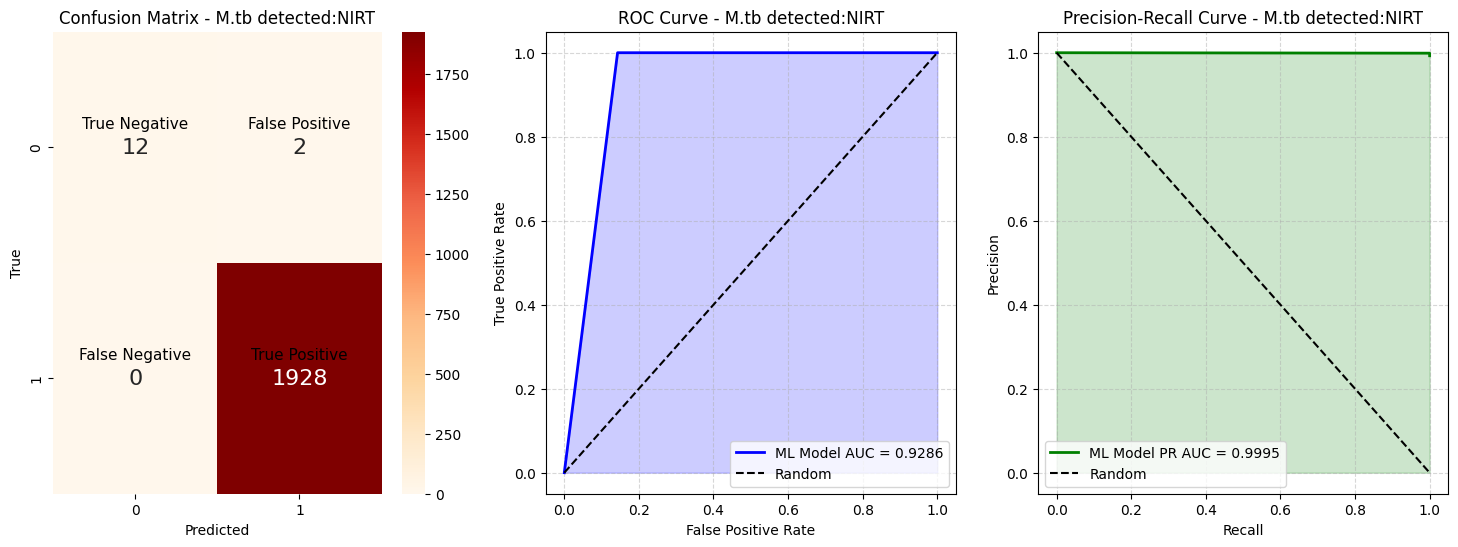

Classification Report - M.tb detected:NIRT

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       1.00      1.00      1.00      1928

    accuracy                           1.00      1942
   macro avg       1.00      0.93      0.96      1942
weighted avg       1.00      1.00      1.00      1942

Sensitivity: 1.0000
Specificity: 0.8571
NPV: 1.0000
PPV: 0.9990
Accuracy: 0.9226
Cohen's Kappa: 0.9990
Fowlkes-Mallows Score: 0.9990
Matthews Correlation Coefficient: 0.9253
F1 Score: 0.9995


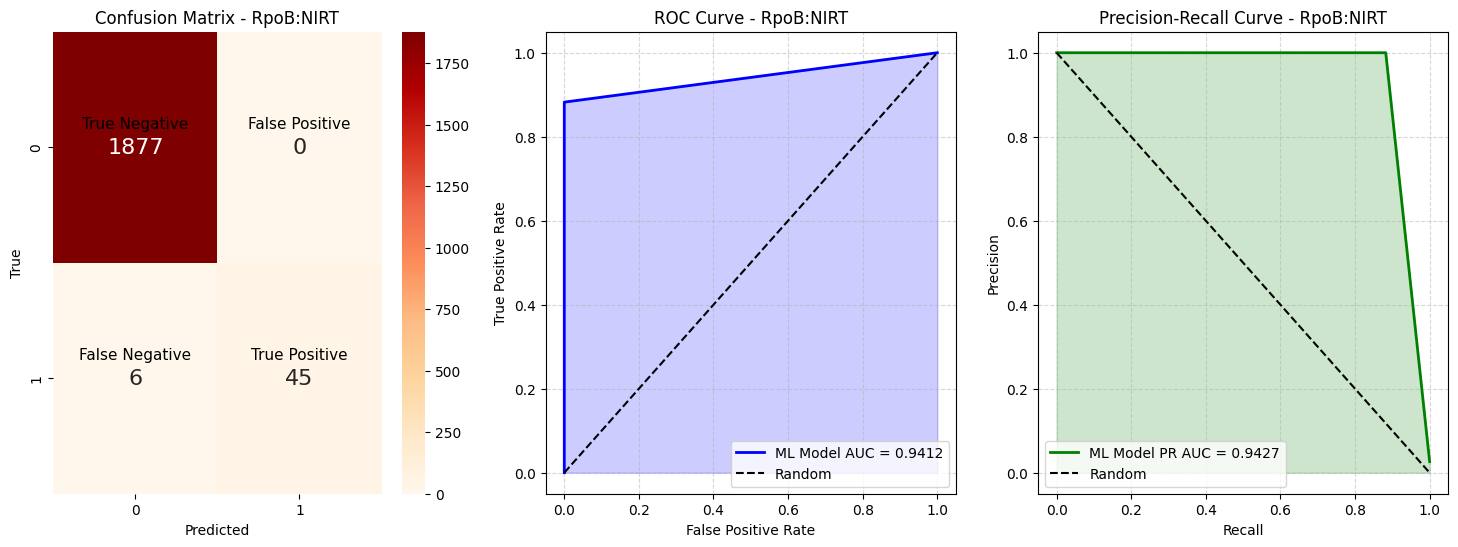

Classification Report - RpoB:NIRT

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1877
         1.0       1.00      0.88      0.94        51

    accuracy                           1.00      1928
   macro avg       1.00      0.94      0.97      1928
weighted avg       1.00      1.00      1.00      1928

Sensitivity: 0.8824
Specificity: 1.0000
NPV: 0.9968
PPV: 1.0000
Accuracy: 0.9359
Cohen's Kappa: 0.9969
Fowlkes-Mallows Score: 0.9967
Matthews Correlation Coefficient: 0.9378
F1 Score: 0.9375


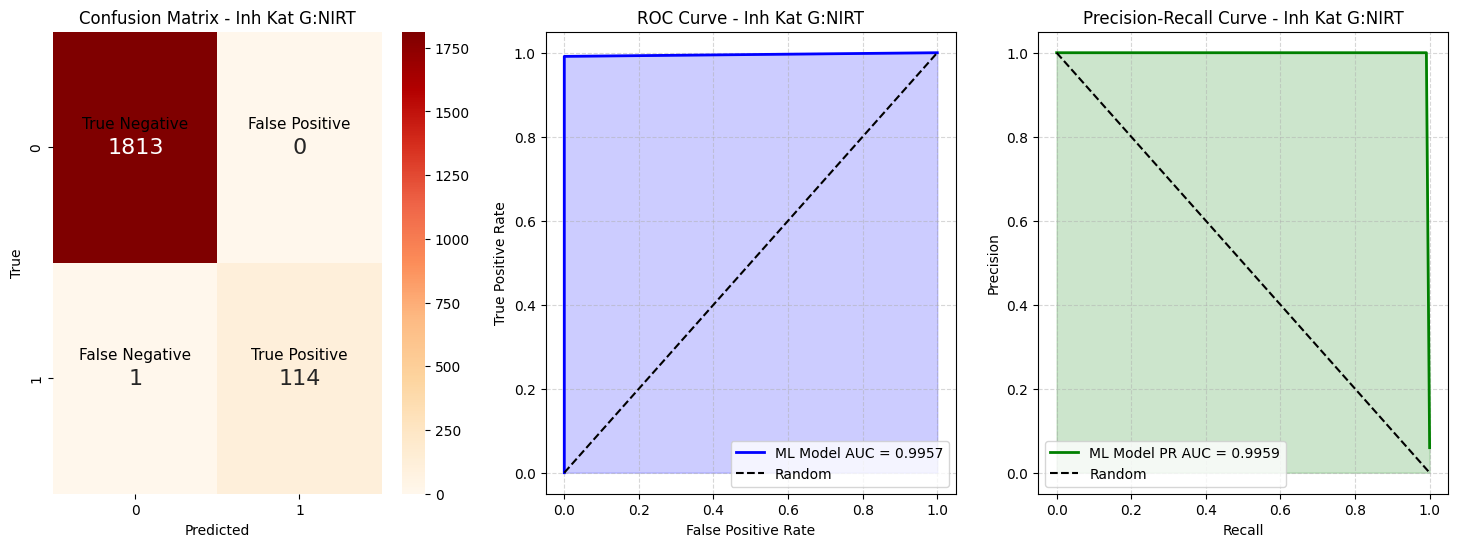

Classification Report - Inh Kat G:NIRT

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1813
         1.0       1.00      0.99      1.00       115

    accuracy                           1.00      1928
   macro avg       1.00      1.00      1.00      1928
weighted avg       1.00      1.00      1.00      1928

Sensitivity: 0.9913
Specificity: 1.0000
NPV: 0.9994
PPV: 1.0000
Accuracy: 0.9954
Cohen's Kappa: 0.9995
Fowlkes-Mallows Score: 0.9994
Matthews Correlation Coefficient: 0.9954
F1 Score: 0.9956


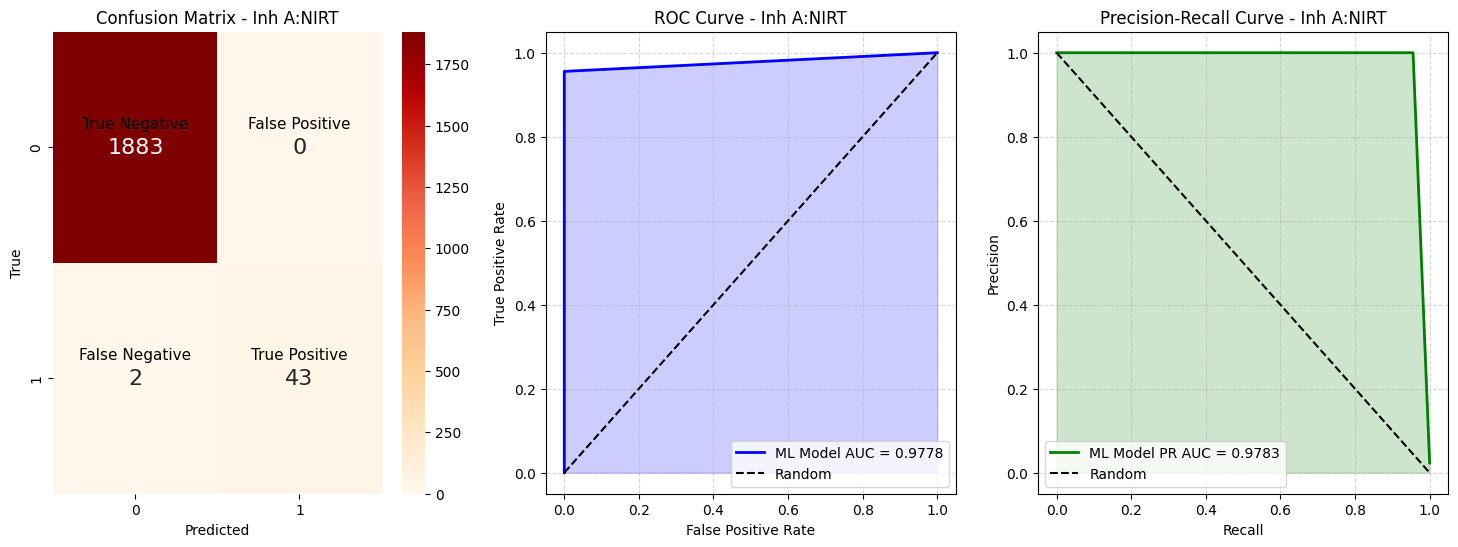

Classification Report - Inh A:NIRT

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1883
         1.0       1.00      0.96      0.98        45

    accuracy                           1.00      1928
   macro avg       1.00      0.98      0.99      1928
weighted avg       1.00      1.00      1.00      1928

Sensitivity: 0.9556
Specificity: 1.0000
NPV: 0.9989
PPV: 1.0000
Accuracy: 0.9767
Cohen's Kappa: 0.9990
Fowlkes-Mallows Score: 0.9989
Matthews Correlation Coefficient: 0.9770
F1 Score: 0.9773


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, cohen_kappa_score, fowlkes_mallows_score, matthews_corrcoef, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def calculate_metrics(true_labels, predicted_labels):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure cm is at least 2x2
    if cm.shape == (1, 1):
        cm = np.array([[0, cm[0, 0]], [0, 0]])

    # True Positives, True Negatives, False Positives, False Negatives
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    # Sensitivity, Specificity, NPV, PPV
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Cohen's Kappa, Fowlkes-Mallows Score, Matthews Correlation Coefficient
    kappa = cohen_kappa_score(true_labels, predicted_labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, predicted_labels)
    matthews_corr = matthews_corrcoef(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)


    return sensitivity, specificity, npv, ppv, kappa, accuracy, fowlkes_mallows, matthews_corr, f1

def evaluate_model(true_labels, predicted_labels, variable_name):
    # Drop rows with NaN values in true_labels and predicted_labels
    non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
    true_labels = true_labels[non_nan_mask]
    predicted_labels = predicted_labels[non_nan_mask]

    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='', cmap='OrRd', annot_kws={"size": 16}, ax=axes[0])

     
    # Add labels for True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN)
    axes[0].text(0.5, 0.4, 'True Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(0.5, 1.4, 'False Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 0.4, 'False Positive', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 1.4, 'True Positive', ha='center', va='center', fontsize=11, color='black')


    axes[0].set_title(f'Confusion Matrix - {variable_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
    auc_value = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'ML Model AUC = {auc_value:.4f}', color='blue', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - {variable_name}')
    axes[1].legend()
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='blue')

    # PR Curve
    precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
    axes[2].plot(recall, precision, label=f'ML Model PR AUC = {auc(recall, precision):.4f}', color='green', linewidth=2)
    axes[2].plot([0, 1], [1, 0], 'k--', label='Random')
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title(f'Precision-Recall Curve - {variable_name}')
    axes[2].legend()
    axes[2].fill_between(recall, precision, alpha=0.2, color='green')

    plt.show()

    # Classification Report
    print(f'Classification Report - {variable_name}\n')
    print(classification_report(true_labels, predicted_labels))
    
   # Metrics
    sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1 = calculate_metrics(true_labels, predicted_labels)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'NPV: {npv:.4f}')
    print(f'PPV: {ppv:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Cohen\'s Kappa: {kappa:.4f}')
    print(f'Fowlkes-Mallows Score: {fowlkes_mallows:.4f}')
    print(f'Matthews Correlation Coefficient: {matthews_corr:.4f}')
    print(f'F1 Score: {f1:.4f}')


# Gold Standard vs ML Model for Sample condition
evaluate_model(df['Sample condition_m '], df['Sample condition_ai '], 'M.tb detected:NIRT')

# Gold Standard vs ML Model for Resistance to Rifampicin (RpoB)
evaluate_model(df['Resistance to Rifampicin (RpoB)_m '], df['Resistance to Rifampicin (RpoB)_ai '], 'RpoB:NIRT')

# Gold Standard vs ML Model for High Level Resistance to Isoniazid
evaluate_model(df['High Level Resistance to Isoniazid (Inh Kat G )_m '], df['High Level Resistance to Isoniazid_ai '], 'Inh Kat G:NIRT')

# Gold Standard vs ML Model for Low Level Resistance to Isoniazid
evaluate_model(df['Low Level Resistance to Isoniazid (Inh A)_m '], df['Low Level Resistance to Isoniazid_ai'], 'Inh A:NIRT')


In [18]:
import numpy as np

def evaluate_model(true_labels_list, predicted_labels_list, variable_names):
    # Create a subplot with 1 row and 2 columns for ROC and PR curves
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    for true_labels, predicted_labels, variable_name in zip(true_labels_list, predicted_labels_list, variable_names):
        # Remove NaN values from true_labels and predicted_labels
        non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
        true_labels_non_nan = true_labels[non_nan_mask]
        predicted_labels_non_nan = predicted_labels[non_nan_mask]

        # ROC Curve
        fpr, tpr, thresholds = roc_curve(true_labels_non_nan, predicted_labels_non_nan)
        auc_value = auc(fpr, tpr)
        axes[0].plot(fpr, tpr, label=f'{variable_name} (AUC = {auc_value:.4f})', linewidth=2)

        # PR Curve
        precision, recall, _ = precision_recall_curve(true_labels_non_nan, predicted_labels_non_nan)
        axes[1].plot(recall, precision, label=f'{variable_name} (PR AUC = {auc(recall, precision):.4f})', linewidth=2)

    # Set labels and title for ROC Curve
    axes[0].plot([0, 1], [0, 1], 'k--', label='Random', linestyle='--', color='gray')
    axes[0].grid(True, linestyle='--', alpha=0.5)
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve:NIRT')
    axes[0].legend()

    # Set labels and title for PR Curve
    axes[1].plot([0, 1], [1, 0], 'k--', label='Random', linestyle='--', color='gray')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('Recall (Sensitivity)')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision-Recall (PR) Curve:NIRT')
    axes[1].legend()

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    plt.show()

# Example usage with multiple sets of true and predicted labels
evaluate_model(
    [df['Sample condition_m '], df['Resistance to Rifampicin (RpoB)_m '], df['High Level Resistance to Isoniazid (Inh Kat G )_m '], df['Low Level Resistance to Isoniazid (Inh A)_m '],
     df_1['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'], df_1['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'], df_1['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m']],
    [df['Sample condition_ai '], df['Resistance to Rifampicin (RpoB)_ai '], df['High Level Resistance to Isoniazid_ai '], df['Low Level Resistance to Isoniazid_ai'], 
     df_1['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'], df_1['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai'], df_1['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai']],
    ['M.tb detected:NIRT', 'RpoB:NIRT', 'Inh Kat G:NIRT', 'Inh A:NIRT', 'gyrA, gyrB:NIRT', 'Km, Am and Cm (rrs):NIRT', 'Low Level Km (eis):NIRT']
)


NameError: name 'df_1' is not defined

In [ ]:
###NIRT_LPA

#importing nirt SL-lpa dataset
import pandas as pd

# Specify the file path
file_path = r'C:\Users\harshvats\Downloads\NIRT_SL_LPA.xlsx'

# Read the Excel file into a DataFrame
try:
    df_1 = pd.read_excel(file_path)

    # Display the variable headers
    variable_headers = df.columns.tolist()
    print("Variable Headers:")
    for header in variable_headers:
        print(header)

except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except pd.errors.EmptyDataError:
    print(f"The file at path {file_path} is empty.")
except pd.errors.ParserError as e:
    print(f"Error parsing Excel file: {e}")

Variable Headers:
S.No 
Nikshay Id_m 
Sample condition_m 
Resistance to Rifampicin (RpoB)_m 
High Level Resistance to Isoniazid (Inh Kat G )_m 
Low Level Resistance to Isoniazid (Inh A)_m 
|
Sample condition_ai 
Resistance to Rifampicin (RpoB)_ai 
High Level Resistance to Isoniazid_ai 
Low Level Resistance to Isoniazid_ai


In [ ]:
print(df_1.columns)

Index(['S.No ', 'Nikshay ID_m', 'Sample condition_m',
       'Resistance to Fluoroquinolones: (gyr A, gyr B)_m',
       'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m',
       'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m',
       'Unnamed: 6', 'Sample condition_ai',
       'Resistance to Fluoroquinolones: (gyr A, gyr B)_ai',
       'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai',
       'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Nikshay ID_m', 'Sample condition_m',
                    'Resistance to Fluoroquinolones: (gyr A, gyr B)_m',
                    'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m',
                    'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m',
                    'Unnamed: 6', 'Sample condition_ai',
                    'Resistance to Fluoroquinolones: (gyr A, gyr B)_ai',
                    'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai',
                    'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df_1[header].value_counts())
    print("\n")


Variable: Nikshay ID_m
Nikshay ID_m
2576    1
856     1
1262    1
1223    1
997     1
       ..
2949    1
3174    1
2963    1
3004    1
1323    1
Name: count, Length: 174, dtype: int64


Variable: Sample condition_m
Sample condition_m
M.tb detected: All Sensitive                   152
M.tb detected: FLQ resistant, SLI sensitive     11
Indeterminate: Repeat SL-LPA                     8
M.tb detected: FQ Inferred                       3
Name: count, dtype: int64


Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Not Detected    150
Detected         12
Inferred          4
Name: count, dtype: int64


Variable: Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance not detected    166
Name: count, dtype: int64


Variable: Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m
Resistance to Second Line Injectable Drugs: (Low Level 

In [ ]:

import pandas as pd

# Assuming df is your DataFrame and the specified variables are present
variables_to_merge = ['Resistance to Fluoroquinolones: (gyr A, gyr B)_m',
                       'Resistance to Fluoroquinolones: (gyr A, gyr B)_ai',]

for variable in variables_to_merge:
    df_1[variable] = df_1[variable].replace({
        'Detected': 'Detected/Inferred',
        'Inferred': 'Detected/Inferred'
    })

    # Print the updated frequency count for the variable
    print(f"Variable: {variable}")
    print(df_1[variable].value_counts())
    print("\n")

Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Not Detected         150
Detected/Inferred     16
Name: count, dtype: int64


Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_ai
Resistance to Fluoroquinolones: (gyr A, gyr B)_ai
Not Detected         145
Detected/Inferred     14
Name: count, dtype: int64




In [ ]:
# Replace values in Sample condition_AI


# Replace values in Resistance to Rifampicin (RpoB)_AI
df_1['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'] = df_1['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_AI
df_1['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'] = df_1['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'].replace({
    'Resistance not detected': 0,
})

# Replace values in Low Level Resistance to Isoniazid_AI
df_1['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m'] = df_1['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m'].replace({
    'Resistance not detected': 0,
})



# Replace values in Resistance to Rifampicin (RpoB)_M
df_1['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'] = df_1['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_M
df_1[ 'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai'] = df_1[ 'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai'].replace({
    'Resistance not detected': 0,
})

# Replace values in Low Level Resistance to Isoniazid_M
df_1['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'] = df_1['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'].replace({
    'Resistance not detected': 0,
})

# Print the updated DataFrame
print(df_1)


     S.No   Nikshay ID_m                           Sample condition_m  \
0        1          2576                 M.tb detected: All Sensitive   
1        2           621                 M.tb detected: All Sensitive   
2        3          7036                 M.tb detected: All Sensitive   
3        4           655  M.tb detected: FLQ resistant, SLI sensitive   
4        5           657  M.tb detected: FLQ resistant, SLI sensitive   
..     ...           ...                                          ...   
169    170          6075                 M.tb detected: All Sensitive   
170    171          6127                 M.tb detected: All Sensitive   
171    172          6138                 M.tb detected: All Sensitive   
172    173          1340                 M.tb detected: All Sensitive   
173    174          1323                 M.tb detected: All Sensitive   

     Resistance to Fluoroquinolones: (gyr A, gyr B)_m  \
0                                                 0.0   
1        

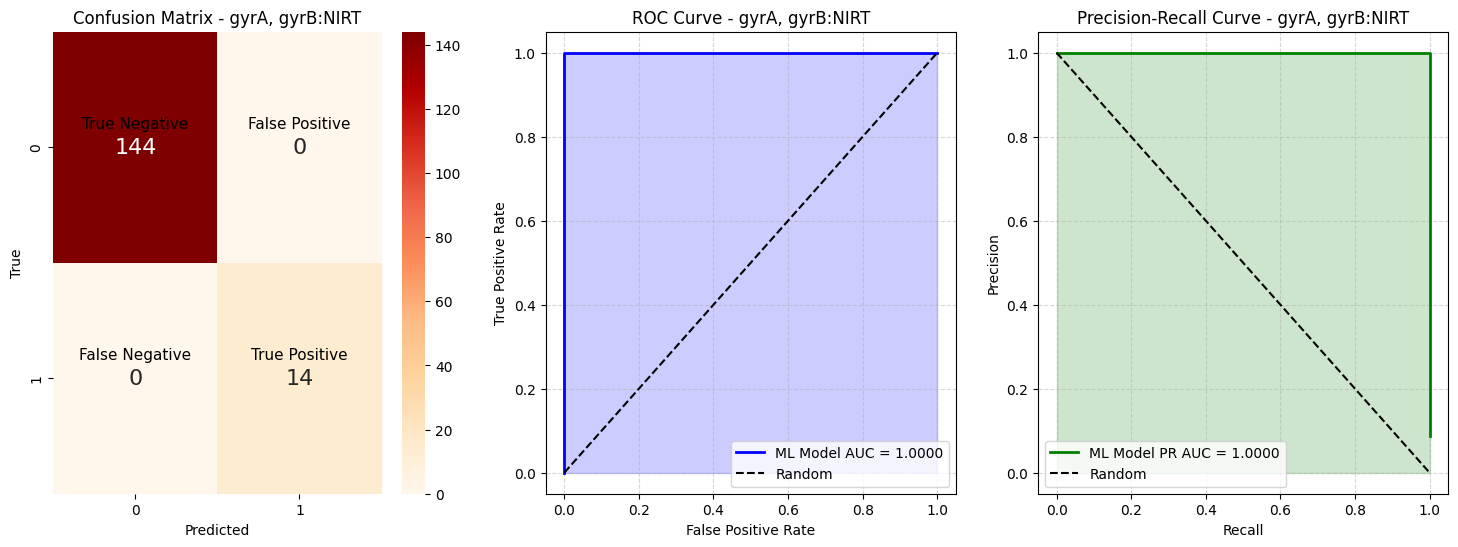

Classification Report - gyrA, gyrB:NIRT

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       144
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

Sensitivity: 1.0000
Specificity: 1.0000
NPV: 1.0000
PPV: 1.0000
Accuracy: 1.0000
Cohen's Kappa: 1.0000
Fowlkes-Mallows Score: 1.0000
Matthews Correlation Coefficient: 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, cohen_kappa_score, fowlkes_mallows_score, matthews_corrcoef, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_metrics(true_labels, predicted_labels):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure cm is at least 2x2
    if cm.shape == (1, 1):
        cm = np.array([[0, cm[0, 0]], [0, 0]])

    # True Positives, True Negatives, False Positives, False Negatives
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    # Sensitivity, Specificity, NPV, PPV
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Cohen's Kappa, Fowlkes-Mallows Score, Matthews Correlation Coefficient
    kappa = cohen_kappa_score(true_labels, predicted_labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, predicted_labels)
    matthews_corr = matthews_corrcoef(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    return sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr

def evaluate_model(true_labels, predicted_labels, variable_name):
    # Drop rows with NaN values in true_labels and predicted_labels
    non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
    true_labels = true_labels[non_nan_mask]
    predicted_labels = predicted_labels[non_nan_mask]

    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='', cmap='OrRd', annot_kws={"size": 16}, ax=axes[0])

     
    # Add labels for True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN)
    axes[0].text(0.5, 0.4, 'True Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(0.5, 1.4, 'False Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 0.4, 'False Positive', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 1.4, 'True Positive', ha='center', va='center', fontsize=11, color='black')


    axes[0].set_title(f'Confusion Matrix - {variable_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
    auc_value = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'ML Model AUC = {auc_value:.4f}', color='blue', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - {variable_name}')
    axes[1].legend()
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='blue')

    # PR Curve
    precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
    axes[2].plot(recall, precision, label=f'ML Model PR AUC = {auc(recall, precision):.4f}', color='green', linewidth=2)
    axes[2].plot([0, 1], [1, 0], 'k--', label='Random')
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title(f'Precision-Recall Curve - {variable_name}')
    axes[2].legend()
    axes[2].fill_between(recall, precision, alpha=0.2, color='green')

    plt.show()

    # Classification Report
    print(f'Classification Report - {variable_name}\n')
    print(classification_report(true_labels, predicted_labels))
    
   # Metrics
    sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1 = calculate_metrics(true_labels, predicted_labels)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'NPV: {npv:.4f}')
    print(f'PPV: {ppv:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Cohen\'s Kappa: {kappa:.4f}')
    print(f'Fowlkes-Mallows Score: {fowlkes_mallows:.4f}')
    print(f'Matthews Correlation Coefficient: {matthews_corr:.4f}')
    print(f'F1 Score: {f1:.4f}')


# Gold Standard vs ML Model for Resistance to Rifampicin (RpoB)
evaluate_model(df_1['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'], df_1['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'], 'gyrA, gyrB:NIRT')




C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


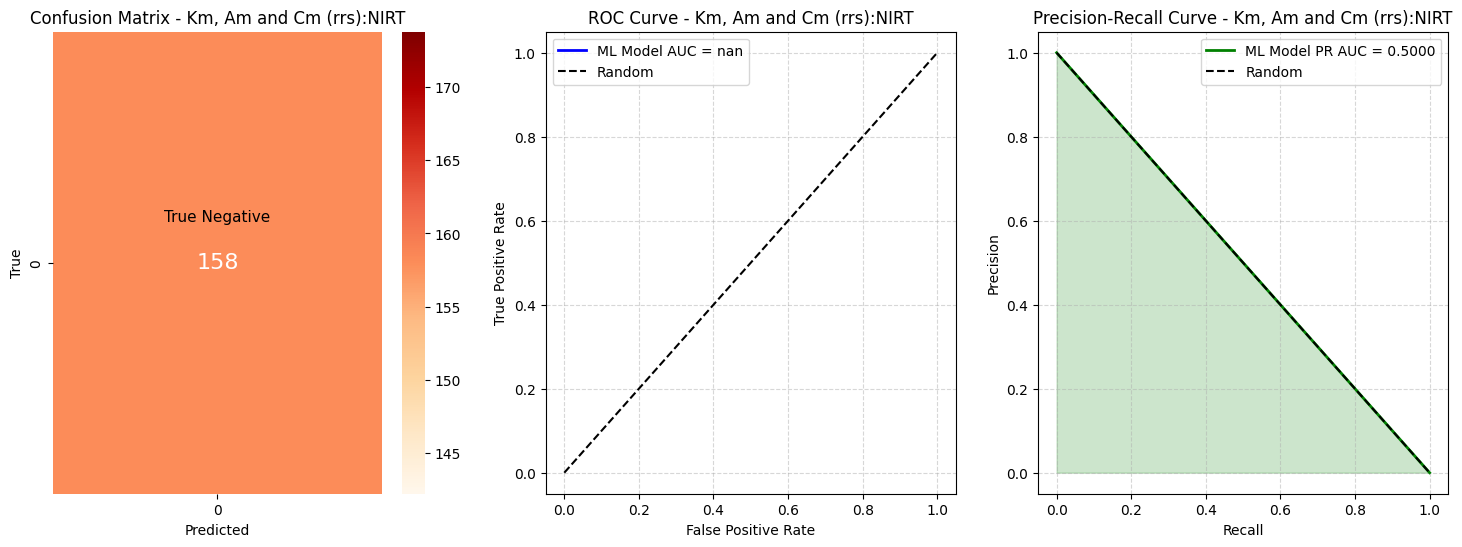

Classification Report - Km, Am and Cm (rrs):NIRT

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       158

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

Sensitivity: 0.0000
Specificity: 0.0000
NPV: 0.0000
PPV: 0.0000
Accuracy: 1.0000
Cohen's Kappa: nan
Fowlkes-Mallows Score: 1.0000
Matthews Correlation Coefficient: 0.0000


C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


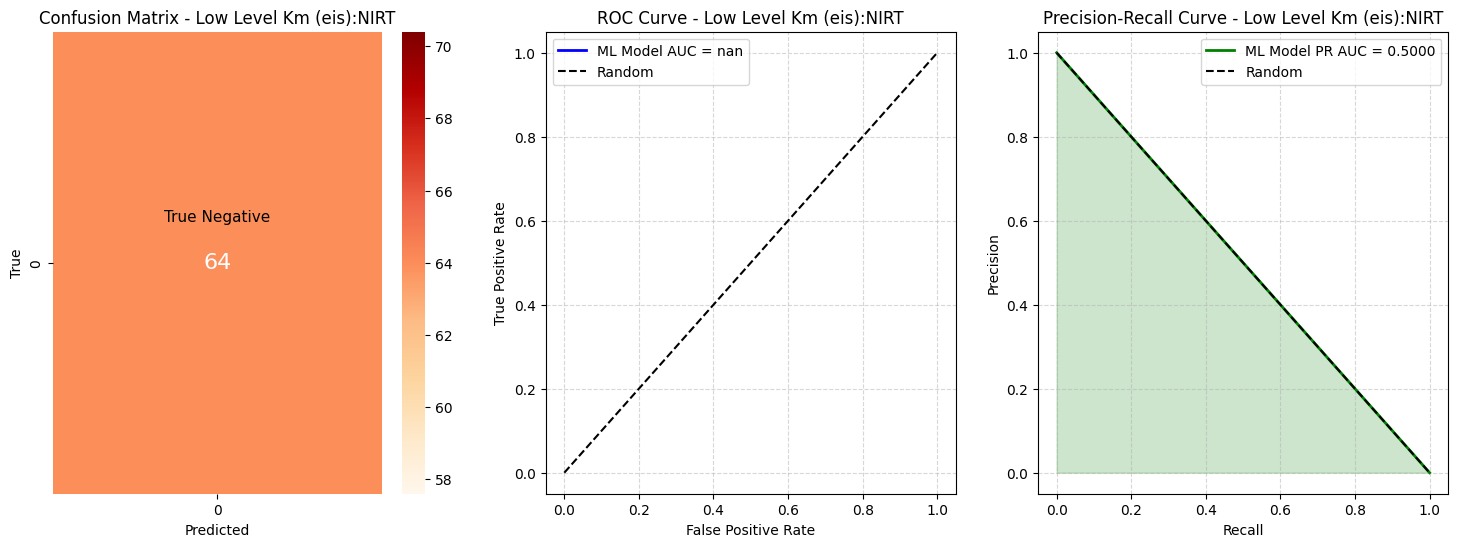

Classification Report - Low Level Km (eis):NIRT

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        64

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64

Sensitivity: 0.0000
Specificity: 0.0000
NPV: 0.0000
PPV: 0.0000
Accuracy: 1.0000
Cohen's Kappa: nan
Fowlkes-Mallows Score: 1.0000
Matthews Correlation Coefficient: 0.0000


C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, cohen_kappa_score, fowlkes_mallows_score, matthews_corrcoef, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_metrics(true_labels, predicted_labels):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure cm is at least 2x2
    if cm.shape == (1, 1):
        cm = np.array([[0, cm[0, 0]], [0, 0]])

    # True Positives, True Negatives, False Positives, False Negatives
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    # Sensitivity, Specificity, NPV, PPV
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)


    # Cohen's Kappa, Fowlkes-Mallows Score, Matthews Correlation Coefficient
    kappa = cohen_kappa_score(true_labels, predicted_labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, predicted_labels)
    matthews_corr = matthews_corrcoef(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    return sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1

def evaluate_model(true_labels, predicted_labels, variable_name):
    # Drop rows with NaN values in true_labels and predicted_labels
    non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
    true_labels = true_labels[non_nan_mask]
    predicted_labels = predicted_labels[non_nan_mask]

    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='', cmap='OrRd', annot_kws={"size": 16}, ax=axes[0])

     
    # Add labels for True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN)
    axes[0].text(0.5, 0.4, 'True Negative', ha='center', va='center', fontsize=11, color='black')
    #axes[0].text(0.5, 1.4, 'False Negative', ha='center', va='center', fontsize=11, color='black')
    #axes[0].text(1.5, 0.4, 'False Positive', ha='center', va='center', fontsize=11, color='black')
    #axes[0].text(1.5, 1.4, 'True Positive', ha='center', va='center', fontsize=11, color='black')


    axes[0].set_title(f'Confusion Matrix - {variable_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
    auc_value = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'ML Model AUC = {auc_value:.4f}', color='blue', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - {variable_name}')
    axes[1].legend()
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='blue')

    # PR Curve
    precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
    axes[2].plot(recall, precision, label=f'ML Model PR AUC = {auc(recall, precision):.4f}', color='green', linewidth=2)
    axes[2].plot([0, 1], [1, 0], 'k--', label='Random')
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title(f'Precision-Recall Curve - {variable_name}')
    axes[2].legend()
    axes[2].fill_between(recall, precision, alpha=0.2, color='green')

    plt.show()

    # Classification Report
    print(f'Classification Report - {variable_name}\n')
    print(classification_report(true_labels, predicted_labels))
    
   # Metrics
    sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, f1 = calculate_metrics(true_labels, predicted_labels)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'NPV: {npv:.4f}')
    print(f'PPV: {ppv:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Cohen\'s Kappa: {kappa:.4f}')
    print(f'Fowlkes-Mallows Score: {fowlkes_mallows:.4f}')
    print(f'Matthews Correlation Coefficient: {matthews_corr:.4f}')
    print(f'F1 Score: {f1:.4f}')

# Gold Standard vs ML Model for High Level Resistance to Isoniazid
evaluate_model(df_1['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'], df_1['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai'], 'Km, Am and Cm (rrs):NIRT')

# Gold Standard vs ML Model for Low Level Resistance to Isoniazid
evaluate_model(df_1['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m'], df_1['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'], 'Low Level Km (eis):NIRT')



In [ ]:
#IRL-FL_LPA

###NIRT_LPA

#importing nirt SL-lpa dataset
import pandas as pd

# Specify the file path
file_path = r"C:\Users\harshvats\Downloads\IRL_FL-LPA.xlsx"

# Read the Excel file into a DataFrame
try:
    df_2 = pd.read_excel(file_path)

    # Display the variable headers
    variable_headers = df_2.columns.tolist()
    print("Variable Headers:")
    for header in variable_headers:
        print(header)

except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except pd.errors.EmptyDataError:
    print(f"The file at path {file_path} is empty.")
except pd.errors.ParserError as e:
    print(f"Error parsing Excel file: {e}")



Variable Headers:
S.No 
Nikshay Id_m
Sample condition_m
Resistance to Rifampicin (RpoB)_m
High Level Resistance to Isoniazid_m
Low Level Resistance to Isoniazid_m
|
Sample condition_ai
Resistance to Rifampicin (RpoB)_ai
High Level Resistance to Isoniazid_ai
Low Level Resistance to Isoniazid_ai


In [ ]:
print(df_2.columns)

Index(['S.No ', 'Nikshay Id_m', 'Sample condition_m',
       'Resistance to Rifampicin (RpoB)_m',
       'High Level Resistance to Isoniazid_m',
       'Low Level Resistance to Isoniazid_m', '|', 'Sample condition_ai',
       'Resistance to Rifampicin (RpoB)_ai',
       'High Level Resistance to Isoniazid_ai',
       'Low Level Resistance to Isoniazid_ai'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Nikshay Id_m', 'Sample condition_m',
                    'Resistance to Rifampicin (RpoB)_m',
                    'High Level Resistance to Isoniazid_m',
                    'Low Level Resistance to Isoniazid_m', '|', 'Sample condition_ai',
                    'Resistance to Rifampicin (RpoB)_ai',
                    'High Level Resistance to Isoniazid_ai',
                    'Low Level Resistance to Isoniazid_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df_2[header].value_counts())
    print("\n")


Variable: Nikshay Id_m
Nikshay Id_m
3133    2
3121    2
3148    2
2374    2
2368    2
       ..
2967    1
2969    1
2970    1
2975    1
2615    1
Name: count, Length: 848, dtype: int64


Variable: Sample condition_m
Sample condition_m
M.tb detected: Rif and Inh Sensitive    751
M.tb detected: Send for SL-LPA           54
Mtb not detected                         47
M.tb detected: All Sensitive              1
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_m
Resistance to Rifampicin (RpoB)_m
Not Detected    766
Detected         38
Inferred          2
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid_m
High Level Resistance to Isoniazid_m
Not Detected    752
Detected         54
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid_m
Low Level Resistance to Isoniazid_m
Not Detected    796
Detected         10
Name: count, dtype: int64


Variable: |
|
|    865
Name: count, dtype: int64


Variable: Sample condition_ai
Sample condi

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'Sample condition_AI' is the variable
df_2['Sample condition_m'] = df_2['Sample condition_m'].replace({
    'M.tb detected: Rif and Inh Sensitive': 'M.tb detected',
    'M.tb detected: Send for SL-LPA': 'M.tb detected',
    'M.tb detected: All Sensitive': 'M.tb detected'
})
# Assuming df is your DataFrame
#df_2 = df_2[df_2['Sample condition_m'] != 'Invalid']

# Assuming df is your DataFrame
#df_2 = df_2[df_2['Sample condition_m'] != 'Indeterminate: Repeat FL-LPA']

# Assuming df is your DataFrame
#df_2 = df_2[df_2['Sample condition_m'] != 'Invalid: Repeat FL-LPA']


# Check the updated frequency count for 'Sample condition_AI'
print("Variable: Sample condition_m")
print(df_2['Sample condition_m'].value_counts())

Variable: Sample condition_m
Sample condition_m
M.tb detected       806
Mtb not detected     47
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and the specified variables are present
variables_to_merge = ['Resistance to Rifampicin (RpoB)_m',
                    'Resistance to Rifampicin (RpoB)_ai',
                    'High Level Resistance to Isoniazid_ai',
                    'Low Level Resistance to Isoniazid_ai']

for variable in variables_to_merge:
    df_2[variable] = df_2[variable].replace({
        'Detected': 'Detected/Inferred',
        'Inferred': 'Detected/Inferred'
    })

    # Print the updated frequency count for the variable
    print(f"Variable: {variable}")
    print(df_2[variable].value_counts())
    print("\n")

Variable: Resistance to Rifampicin (RpoB)_m
Resistance to Rifampicin (RpoB)_m
Not Detected         766
Detected/Inferred     40
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_ai
Resistance to Rifampicin (RpoB)_ai
Not Detected         766
Detected/Inferred     37
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid_ai
High Level Resistance to Isoniazid_ai
Not Detected         753
Detected/Inferred     50
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid_ai
Low Level Resistance to Isoniazid_ai
Not Detected         795
Detected/Inferred      8
Name: count, dtype: int64




In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'Sample condition_AI' is the variable
df_2['Sample condition_ai'] = df_2['Sample condition_ai'].replace({
    'M.tb detected: Rif and Inh Sensitive': 'M.tb detected',
    'M.tb detected: Send for SL-LPA': 'M.tb detected',
    'M.tb detected: All Sensitive': 'M.tb detected',
    'M.tb detected: Rif Senstive and Inh resistance': 'M.tb detected',
    'M.tb detected: Rif Inferred and Inh Sensitive': 'M.tb detected'    
})
# Assuming df is your DataFrame
#df_2 = df_2[df_2['Sample condition_ai'] != 'Invalid']

# Assuming df is your DataFrame
#df_2 = df_2[df_2['Sample condition_ai'] != 'Indeterminate: Repeat FL-LPA']

# Assuming df is your DataFrame
#df_2 = df_2[df_2['Sample condition_ai'] != 'Invalid: Repeat FL-LPA']


# Check the updated frequency count for 'Sample condition_AI'
print("Variable: Sample condition_ai")
print(df_2['Sample condition_ai'].value_counts())


Variable: Sample condition_ai
Sample condition_ai
M.tb detected                          802
M.tb not detected: Send for Culture     47
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Nikshay Id_m', 'Sample condition_m',
                    'Resistance to Rifampicin (RpoB)_m',
                    'High Level Resistance to Isoniazid_m',
                    'Low Level Resistance to Isoniazid_m', '|', 'Sample condition_ai',
                    'Resistance to Rifampicin (RpoB)_ai',
                    'High Level Resistance to Isoniazid_ai',
                    'Low Level Resistance to Isoniazid_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df_2[header].value_counts())
    print("\n")

Variable: Nikshay Id_m
Nikshay Id_m
3133    2
3121    2
3148    2
2374    2
2368    2
       ..
2967    1
2969    1
2970    1
2975    1
2615    1
Name: count, Length: 848, dtype: int64


Variable: Sample condition_m
Sample condition_m
M.tb detected       806
Mtb not detected     47
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_m
Resistance to Rifampicin (RpoB)_m
Not Detected         766
Detected/Inferred     40
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid_m
High Level Resistance to Isoniazid_m
Not Detected    752
Detected         54
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid_m
Low Level Resistance to Isoniazid_m
Not Detected    796
Detected         10
Name: count, dtype: int64


Variable: |
|
|    865
Name: count, dtype: int64


Variable: Sample condition_ai
Sample condition_ai
M.tb detected                          802
M.tb not detected: Send for Culture     47
Name: count, dtype: int64


Variable: Resist

In [ ]:
# Replace values in Sample condition_AI
df_2['Sample condition_m'] = df_2['Sample condition_m'].replace({
    'Mtb not detected': 0,
    'M.tb detected': 1
})

# Replace values in Resistance to Rifampicin (RpoB)_AI
df_2['Resistance to Rifampicin (RpoB)_m'] = df_2['Resistance to Rifampicin (RpoB)_m'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_AI
df_2['High Level Resistance to Isoniazid_m'] = df_2['High Level Resistance to Isoniazid_m'].replace({
    'Not Detected': 0,
    'Detected': 1
})

# Replace values in Low Level Resistance to Isoniazid_AI
df_2['Low Level Resistance to Isoniazid_m'] = df_2['Low Level Resistance to Isoniazid_m'].replace({
    'Not Detected': 0,
    'Detected': 1
})

# Replace values in Sample condition_M
df_2['Sample condition_ai'] = df_2['Sample condition_ai'].replace({
    'M.tb not detected: Send for Culture': 0,
    'M.tb detected': 1
})

# Replace values in Resistance to Rifampicin (RpoB)_M
df_2['Resistance to Rifampicin (RpoB)_ai'] = df_2['Resistance to Rifampicin (RpoB)_ai'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_M
df_2['High Level Resistance to Isoniazid_ai'] = df_2['High Level Resistance to Isoniazid_ai'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in Low Level Resistance to Isoniazid_M
df_2['Low Level Resistance to Isoniazid_ai'] = df_2['Low Level Resistance to Isoniazid_ai'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Print the updated DataFrame
print(df)


      S.No   Nikshay Id_m   Sample condition_m   \
0         1              2                    1   
1         2              3                    1   
2         3              4                    1   
3         4              5                    1   
4         5              6                    1   
...     ...            ...                  ...   
1940   1941           3010                    1   
1941   1942           3019                    1   
1942   1943           3025                    1   
1943   1944           3004                    1   
1944   1945           7219                    1   

      Resistance to Rifampicin (RpoB)_m   \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
...                                  ...   
1940                                 0.0   
1941                               

In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Nikshay Id_m', 'Sample condition_m',
                    'Resistance to Rifampicin (RpoB)_m',
                    'High Level Resistance to Isoniazid_m',
                    'Low Level Resistance to Isoniazid_m', '|', 'Sample condition_ai',
                    'Resistance to Rifampicin (RpoB)_ai',
                    'High Level Resistance to Isoniazid_ai',
                    'Low Level Resistance to Isoniazid_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df_2[header].value_counts())
    print("\n")

Variable: Nikshay Id_m
Nikshay Id_m
3133    2
3121    2
3148    2
2374    2
2368    2
       ..
2967    1
2969    1
2970    1
2975    1
2615    1
Name: count, Length: 848, dtype: int64


Variable: Sample condition_m
Sample condition_m
1.0    806
0.0     47
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_m
Resistance to Rifampicin (RpoB)_m
0.0    766
1.0     40
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid_m
High Level Resistance to Isoniazid_m
0.0    752
1.0     54
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid_m
Low Level Resistance to Isoniazid_m
0.0    796
1.0     10
Name: count, dtype: int64


Variable: |
|
|    865
Name: count, dtype: int64


Variable: Sample condition_ai
Sample condition_ai
1.0    802
0.0     47
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_ai
Resistance to Rifampicin (RpoB)_ai
0.0    766
1.0     37
Name: count, dtype: int64


Variable: High Level Resistance to Isoni

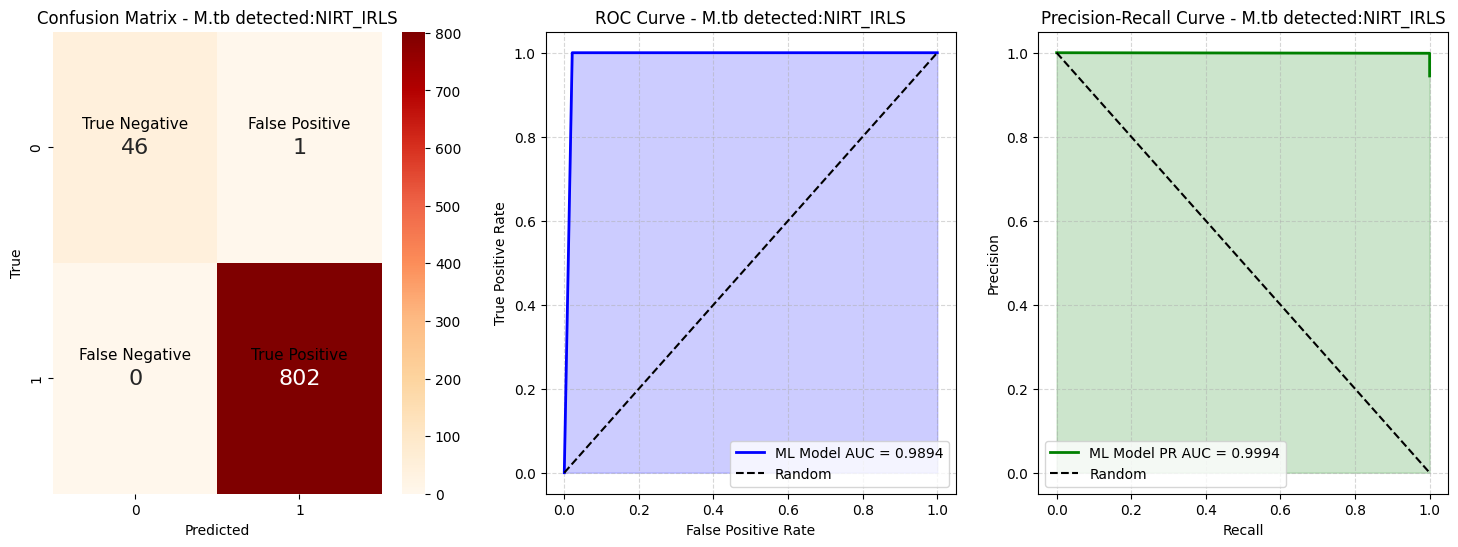

Classification Report - M.tb detected:NIRT_IRLS

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        47
         1.0       1.00      1.00      1.00       802

    accuracy                           1.00       849
   macro avg       1.00      0.99      0.99       849
weighted avg       1.00      1.00      1.00       849

Sensitivity: 1.0000
Specificity: 0.9787
NPV: 1.0000
PPV: 0.9988
Accuracy: 0.9988
Cohen's Kappa: 0.9886
Fowlkes-Mallows Score: 0.9987
Matthews Correlation Coefficient: 0.9887


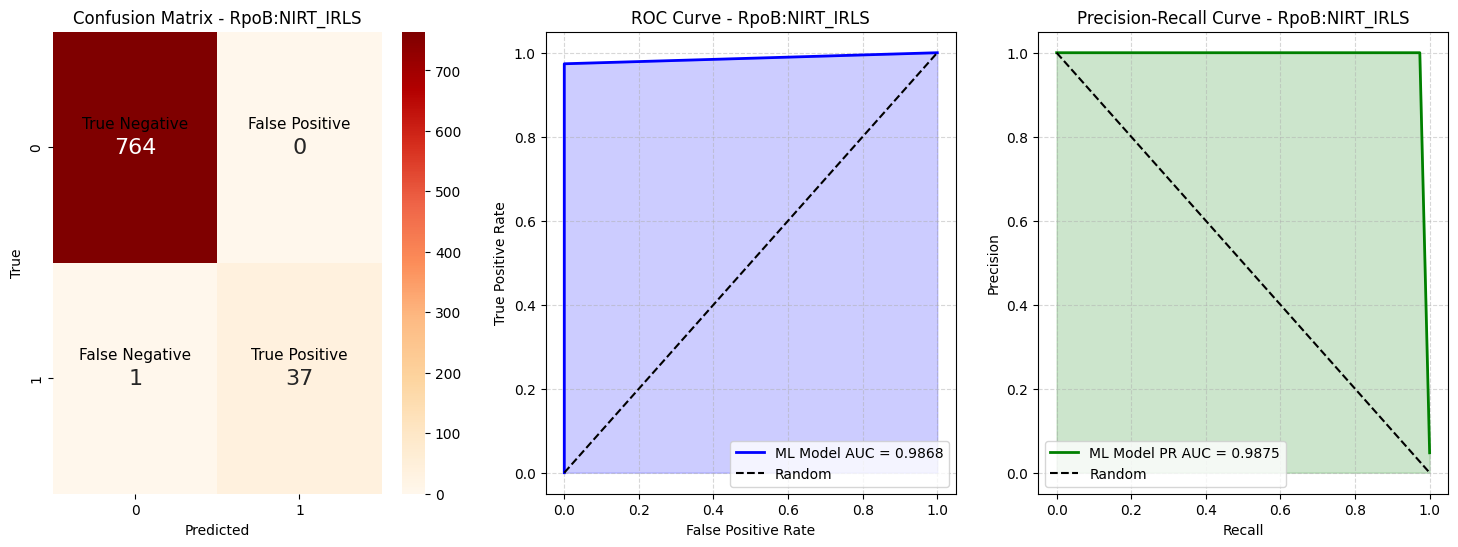

Classification Report - RpoB:NIRT_IRLS

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       764
         1.0       1.00      0.97      0.99        38

    accuracy                           1.00       802
   macro avg       1.00      0.99      0.99       802
weighted avg       1.00      1.00      1.00       802

Sensitivity: 0.9737
Specificity: 1.0000
NPV: 0.9987
PPV: 1.0000
Accuracy: 0.9988
Cohen's Kappa: 0.9860
Fowlkes-Mallows Score: 0.9986
Matthews Correlation Coefficient: 0.9861


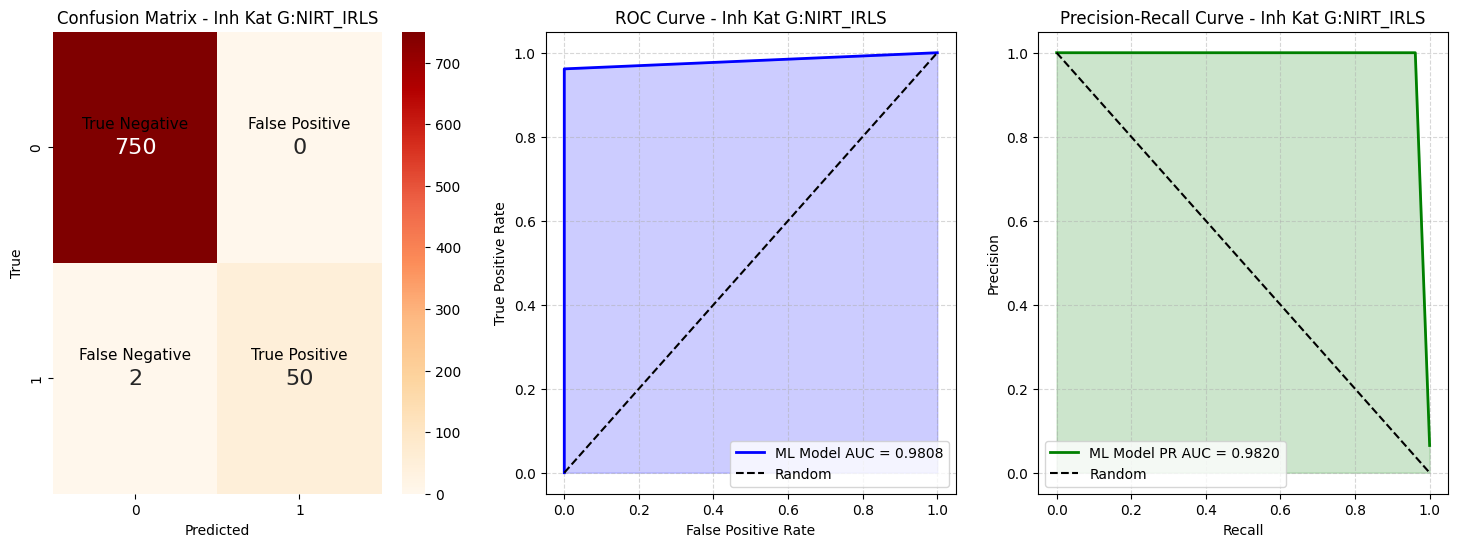

Classification Report - Inh Kat G:NIRT_IRLS

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       750
         1.0       1.00      0.96      0.98        52

    accuracy                           1.00       802
   macro avg       1.00      0.98      0.99       802
weighted avg       1.00      1.00      1.00       802

Sensitivity: 0.9615
Specificity: 1.0000
NPV: 0.9973
PPV: 1.0000
Accuracy: 0.9975
Cohen's Kappa: 0.9791
Fowlkes-Mallows Score: 0.9972
Matthews Correlation Coefficient: 0.9793


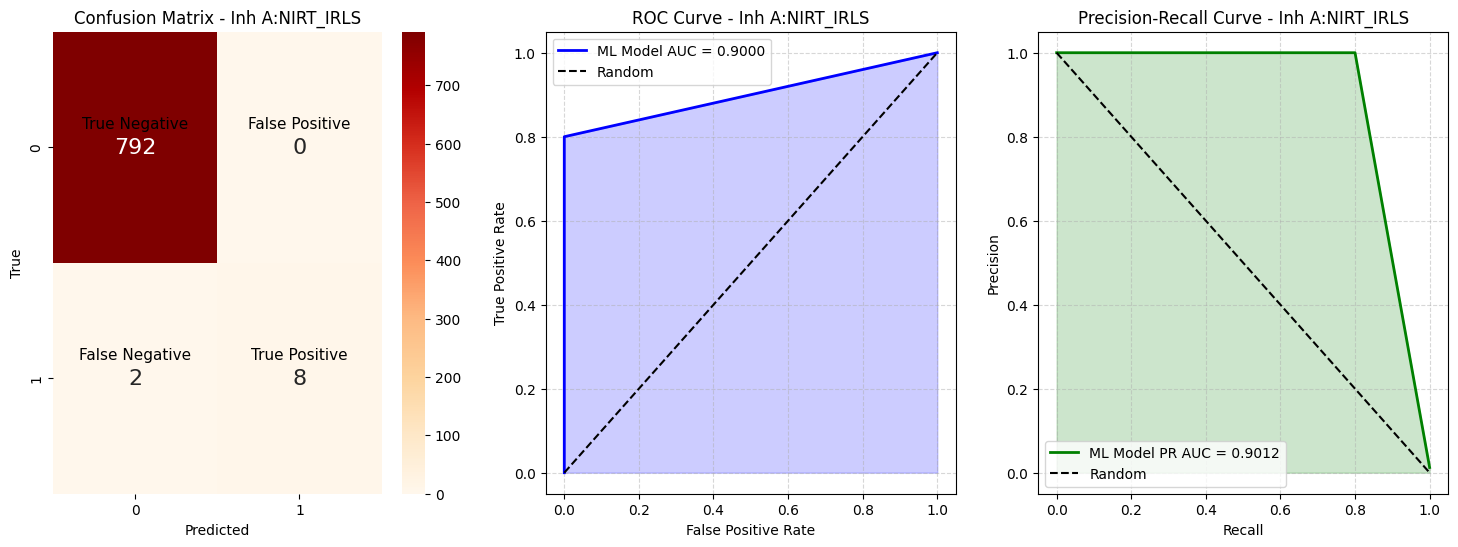

Classification Report - Inh A:NIRT_IRLS

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       792
         1.0       1.00      0.80      0.89        10

    accuracy                           1.00       802
   macro avg       1.00      0.90      0.94       802
weighted avg       1.00      1.00      1.00       802

Sensitivity: 0.8000
Specificity: 1.0000
NPV: 0.9975
PPV: 1.0000
Accuracy: 0.9975
Cohen's Kappa: 0.8876
Fowlkes-Mallows Score: 0.9975
Matthews Correlation Coefficient: 0.8933


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, cohen_kappa_score, fowlkes_mallows_score, matthews_corrcoef, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def calculate_metrics(true_labels, predicted_labels):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure cm is at least 2x2
    if cm.shape == (1, 1):
        cm = np.array([[0, cm[0, 0]], [0, 0]])

    # True Positives, True Negatives, False Positives, False Negatives
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    # Sensitivity, Specificity, NPV, PPV
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Cohen's Kappa, Fowlkes-Mallows Score, Matthews Correlation Coefficient
    kappa = cohen_kappa_score(true_labels, predicted_labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, predicted_labels)
    matthews_corr = matthews_corrcoef(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    return sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1

def evaluate_model(true_labels, predicted_labels, variable_name):
    # Drop rows with NaN values in true_labels and predicted_labels
    non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
    true_labels = true_labels[non_nan_mask]
    predicted_labels = predicted_labels[non_nan_mask]

    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='', cmap='OrRd', annot_kws={"size": 16}, ax=axes[0])

     
    # Add labels for True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN)
    axes[0].text(0.5, 0.4, 'True Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(0.5, 1.4, 'False Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 0.4, 'False Positive', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 1.4, 'True Positive', ha='center', va='center', fontsize=11, color='black')


    axes[0].set_title(f'Confusion Matrix - {variable_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
    auc_value = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'ML Model AUC = {auc_value:.4f}', color='blue', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - {variable_name}')
    axes[1].legend()
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='blue')

    # PR Curve
    precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
    axes[2].plot(recall, precision, label=f'ML Model PR AUC = {auc(recall, precision):.4f}', color='green', linewidth=2)
    axes[2].plot([0, 1], [1, 0], 'k--', label='Random')
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title(f'Precision-Recall Curve - {variable_name}')
    axes[2].legend()
    axes[2].fill_between(recall, precision, alpha=0.2, color='green')

    plt.show()

    # Classification Report
    print(f'Classification Report - {variable_name}\n')
    print(classification_report(true_labels, predicted_labels))
    
   # Metrics
    sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1 = calculate_metrics(true_labels, predicted_labels)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'NPV: {npv:.4f}')
    print(f'PPV: {ppv:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Cohen\'s Kappa: {kappa:.4f}')
    print(f'Fowlkes-Mallows Score: {fowlkes_mallows:.4f}')
    print(f'Matthews Correlation Coefficient: {matthews_corr:.4f}')
    print(f'F1 Score: {f1:.4f}')


# Gold Standard vs ML Model for Sample condition
evaluate_model(df_2['Sample condition_ai'], df_2['Sample condition_m'], 'M.tb detected:NIRT_IRLS')

# Gold Standard vs ML Model for Resistance to Rifampicin (RpoB)
evaluate_model(df_2['Resistance to Rifampicin (RpoB)_m'], df_2['Resistance to Rifampicin (RpoB)_ai'], 'RpoB:NIRT_IRLS')

# Gold Standard vs ML Model for High Level Resistance to Isoniazid
evaluate_model(df_2['High Level Resistance to Isoniazid_m'], df_2['High Level Resistance to Isoniazid_ai'], 'Inh Kat G:NIRT_IRLS')

# Gold Standard vs ML Model for Low Level Resistance to Isoniazid
evaluate_model(df_2['Low Level Resistance to Isoniazid_m'], df_2['Low Level Resistance to Isoniazid_ai'], 'Inh A:NIRT_IRLS')



In [ ]:

#IRL-FL_LPA

###NIRT_LPA

#importing nirt SL-lpa dataset
import pandas as pd

# Specify the file path
file_path = r"C:\Users\harshvats\Downloads\IRL_SL_LPA.xlsx"

# Read the Excel file into a DataFrame
try:
    df_3 = pd.read_excel(file_path)

    # Display the variable headers
    variable_headers = df_3.columns.tolist()
    print("Variable Headers:")
    for header in variable_headers:
        print(header)

except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except pd.errors.EmptyDataError:
    print(f"The file at path {file_path} is empty.")
except pd.errors.ParserError as e:
    print(f"Error parsing Excel file: {e}")

Variable Headers:
S.No 
Nikshay ID_m
Sample condition_m
Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m
abc
Sample condition_ai
Resistance to Fluoroquinolones: (gyr A, gyr B)_ai
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai
Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai


In [ ]:
print(df_3.columns)

Index(['S.No ', 'Nikshay ID_m', 'Sample condition_m',
       'Resistance to Fluoroquinolones: (gyr A, gyr B)_m',
       'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m',
       'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m',
       'abc', 'Sample condition_ai',
       'Resistance to Fluoroquinolones: (gyr A, gyr B)_ai',
       'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai',
       'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Nikshay ID_m', 'Sample condition_m',
                    'Resistance to Fluoroquinolones: (gyr A, gyr B)_m',
                    'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m',
                    'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m',
                    'abc', 'Sample condition_ai',
                    'Resistance to Fluoroquinolones: (gyr A, gyr B)_ai',
                    'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai',
                    'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df_3[header].value_counts())
    print("\n")

Variable: Nikshay ID_m
Nikshay ID_m
175     1
3071    1
6648    1
6144    1
7547    1
       ..
7645    1
7660    1
4754    1
5558    1
5225    1
Name: count, Length: 67, dtype: int64


Variable: Sample condition_m
Sample condition_m
M.tb detected: All Sensitive                    40
M.tb detected: FLQ resistant, SLI sensitive     17
M.tb detected: FLQ inferred, SLI sensitive       3
M.tb detected: FLQ resistant, SLI senstive       2
Indeterminate: Repeat SL-LPA                     2
M.tb detected: FLQ Inferred, SLI sensitive       1
M.tb detected: FLQ resistant, SLI Senstitive     1
M.tb detected: Rif and Inh Sensitive             1
Name: count, dtype: int64


Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Not Detected    32
Detected        22
Inferred         6
Name: count, dtype: int64


Variable: Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance to Second Line Injectable Drugs: (Km, Am and Cm)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and the specified variables are present
variables_to_merge = ['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'
                    ]

for variable in variables_to_merge:
    df_3[variable] = df_3[variable].replace({
        'Detected': 'Detected/Inferred',
        'Inferred': 'Detected/Inferred',
   })
    # Print the updated frequency count for the variable
    print(f"Variable: {variable}")
    print(df_3[variable].value_counts())
    print("\n")
    

Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Not Detected         32
Detected/Inferred    28
Name: count, dtype: int64




In [ ]:
import pandas as pd

# Assuming df is your DataFrame and the specified variables are present
variables_to_merge = ['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'
                    ]

for variable in variables_to_merge:
    df_3[variable] = df_3[variable].replace({
        'Detected': 'Detected/Inferred',
        'Inferred': 'Detected/Inferred'
    })

    # Print the updated frequency count for the variable
    print(f"Variable: {variable}")
    print(df_3[variable].value_counts())
    print("\n")

Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_ai
Resistance to Fluoroquinolones: (gyr A, gyr B)_ai
Not Detected         32
Detected/Inferred    28
Name: count, dtype: int64




In [ ]:
import pandas as pd


# Check the updated frequency count for 'Sample condition_AI'
print("Variable: Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m")
print(df_3['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'].value_counts())

# Check the updated frequency count for 'Sample condition_AI'
print("Variable: Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai")
print(df_3['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai'].value_counts())

Variable: Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance not detected    63
Detected                    1
Name: count, dtype: int64
Variable: Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai
Resistance not detected    63
Detected                    1
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Nikshay ID_m', 'Sample condition_m',
                    'Resistance to Fluoroquinolones: (gyr A, gyr B)_m',
                    'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m',
                    'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m',
                    'abc', 'Sample condition_ai',
                    'Resistance to Fluoroquinolones: (gyr A, gyr B)_ai',
                    'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai',
                    'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df_3[header].value_counts())
    print("\n")

Variable: Nikshay ID_m
Nikshay ID_m
175     1
3071    1
6648    1
6144    1
7547    1
       ..
7645    1
7660    1
4754    1
5558    1
5225    1
Name: count, Length: 67, dtype: int64


Variable: Sample condition_m
Sample condition_m
M.tb detected: All Sensitive                    40
M.tb detected: FLQ resistant, SLI sensitive     17
M.tb detected: FLQ inferred, SLI sensitive       3
M.tb detected: FLQ resistant, SLI senstive       2
Indeterminate: Repeat SL-LPA                     2
M.tb detected: FLQ Inferred, SLI sensitive       1
M.tb detected: FLQ resistant, SLI Senstitive     1
M.tb detected: Rif and Inh Sensitive             1
Name: count, dtype: int64


Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Not Detected         32
Detected/Inferred    28
Name: count, dtype: int64


Variable: Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m


In [ ]:
# Replace values in Sample condition_AI


# Replace values in Resistance to Rifampicin (RpoB)_AI
df_3['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'] = df_3['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_AI
df_3['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'] = df_3['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'].replace({
    'Resistance not detected': 0,
    'Detected': 1
})

# Replace values in Low Level Resistance to Isoniazid_AI
df_3['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m'] = df_3['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m'].replace({
    'Resistance not detected': 0,
})

# Replace values in Resistance to Rifampicin (RpoB)_M
df_3['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'] = df_3['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_M
df_3[ 'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai'] = df_3[ 'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai'].replace({
    'Resistance not detected': 0,
    'Detected': 1
})

# Replace values in Low Level Resistance to Isoniazid_M
df_3['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'] = df_3['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'].replace({
    'Resistance not detected': 0,
})

# Print the updated DataFrame
print(df_3)

    S.No   Nikshay ID_m            Sample condition_m  \
0       1           175  M.tb detected: All Sensitive   
1       2           178  M.tb detected: All Sensitive   
2       3           195  M.tb detected: All Sensitive   
3       4           205  M.tb detected: All Sensitive   
4       5           209  M.tb detected: All Sensitive   
..    ...           ...                           ...   
62     63          5190  M.tb detected: All Sensitive   
63     64          5233  M.tb detected: All Sensitive   
64     65          2387  M.tb detected: All Sensitive   
65     66          5223  M.tb detected: All Sensitive   
66     67          5225  M.tb detected: All Sensitive   

    Resistance to Fluoroquinolones: (gyr A, gyr B)_m  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                  

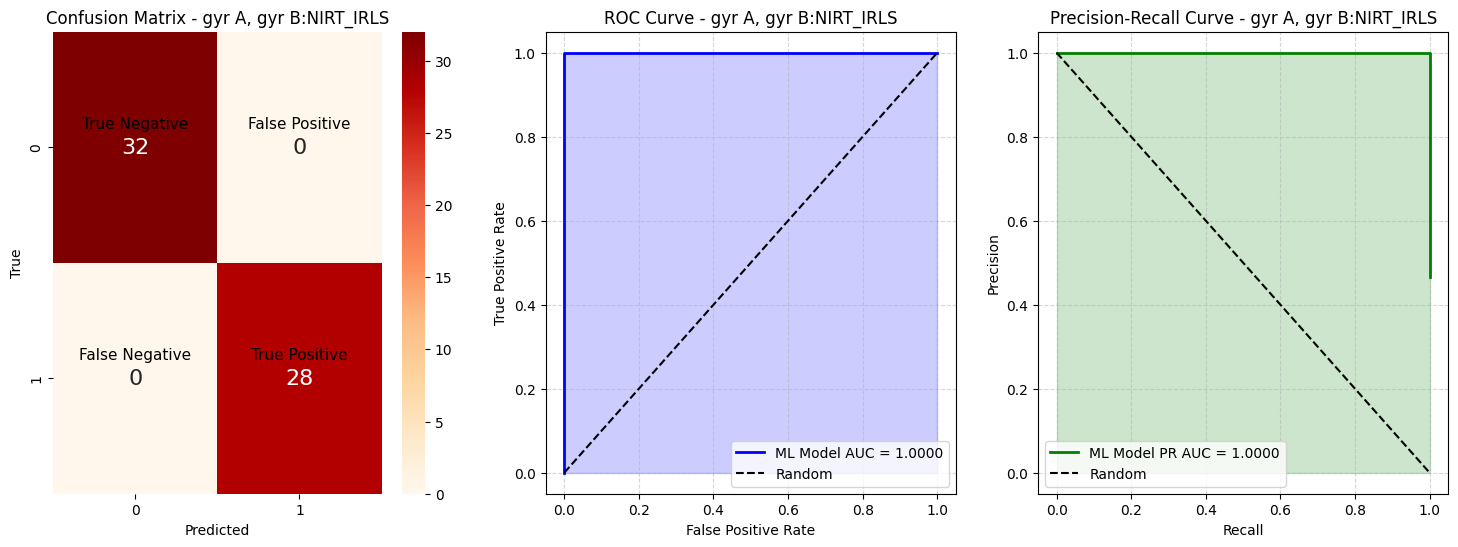

Classification Report - gyr A, gyr B:NIRT_IRLS

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32
         1.0       1.00      1.00      1.00        28

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Sensitivity: 1.0000
Specificity: 1.0000
NPV: 1.0000
PPV: 1.0000
Accuracy: 1.0000
Cohen's Kappa: 1.0000
Fowlkes-Mallows Score: 1.0000
Matthews Correlation Coefficient: 1.0000


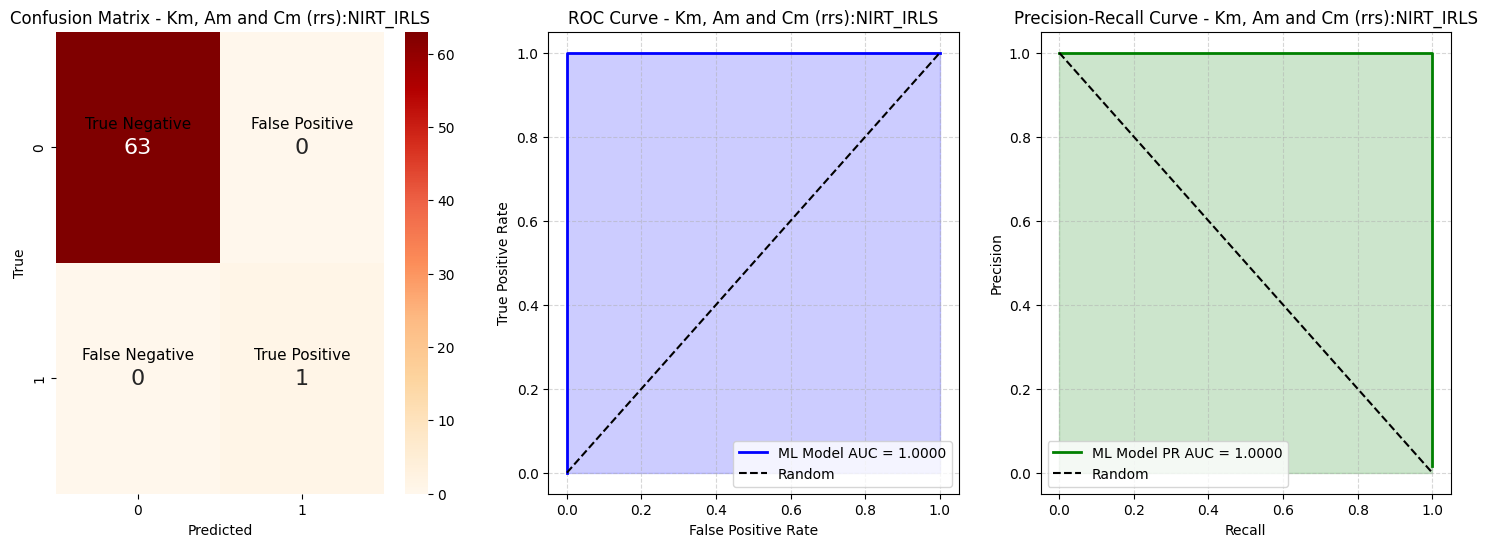

Classification Report - Km, Am and Cm (rrs):NIRT_IRLS

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        63
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64

Sensitivity: 1.0000
Specificity: 1.0000
NPV: 1.0000
PPV: 1.0000
Accuracy: 1.0000
Cohen's Kappa: 1.0000
Fowlkes-Mallows Score: 1.0000
Matthews Correlation Coefficient: 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, cohen_kappa_score, fowlkes_mallows_score, matthews_corrcoef, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_metrics(true_labels, predicted_labels):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure cm is at least 2x2
    if cm.shape == (1, 1):
        cm = np.array([[0, cm[0, 0]], [0, 0]])

    # True Positives, True Negatives, False Positives, False Negatives
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    # Sensitivity, Specificity, NPV, PPV
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Cohen's Kappa, Fowlkes-Mallows Score, Matthews Correlation Coefficient
    kappa = cohen_kappa_score(true_labels, predicted_labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, predicted_labels)
    matthews_corr = matthews_corrcoef(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    return sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1

def evaluate_model(true_labels, predicted_labels, variable_name):
    # Drop rows with NaN values in true_labels and predicted_labels
    non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
    true_labels = true_labels[non_nan_mask]
    predicted_labels = predicted_labels[non_nan_mask]

    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='', cmap='OrRd', annot_kws={"size": 16}, ax=axes[0])

     
    # Add labels for True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN)
    axes[0].text(0.5, 0.4, 'True Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(0.5, 1.4, 'False Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 0.4, 'False Positive', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 1.4, 'True Positive', ha='center', va='center', fontsize=11, color='black')


    axes[0].set_title(f'Confusion Matrix - {variable_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
    auc_value = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'ML Model AUC = {auc_value:.4f}', color='blue', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - {variable_name}')
    axes[1].legend()
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='blue')

    # PR Curve
    precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
    axes[2].plot(recall, precision, label=f'ML Model PR AUC = {auc(recall, precision):.4f}', color='green', linewidth=2)
    axes[2].plot([0, 1], [1, 0], 'k--', label='Random')
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title(f'Precision-Recall Curve - {variable_name}')
    axes[2].legend()
    axes[2].fill_between(recall, precision, alpha=0.2, color='green')

    plt.show()

    # Classification Report
    print(f'Classification Report - {variable_name}\n')
    print(classification_report(true_labels, predicted_labels))
    
   # Metrics
    sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1 = calculate_metrics(true_labels, predicted_labels)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'NPV: {npv:.4f}')
    print(f'PPV: {ppv:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Cohen\'s Kappa: {kappa:.4f}')
    print(f'Fowlkes-Mallows Score: {fowlkes_mallows:.4f}')
    print(f'Matthews Correlation Coefficient: {matthews_corr:.4f}')
    print(f'F1 Score: {f1:.4f}')


# Gold Standard vs ML Model for Resistance to Rifampicin (RpoB)
evaluate_model(df_3['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'], df_3['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'], 'gyr A, gyr B:NIRT_IRLS')

# Gold Standard vs ML Model for High Level Resistance to Isoniazid
evaluate_model(df_3['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'], df_3['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai'], 'Km, Am and Cm (rrs):NIRT_IRLS')




C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


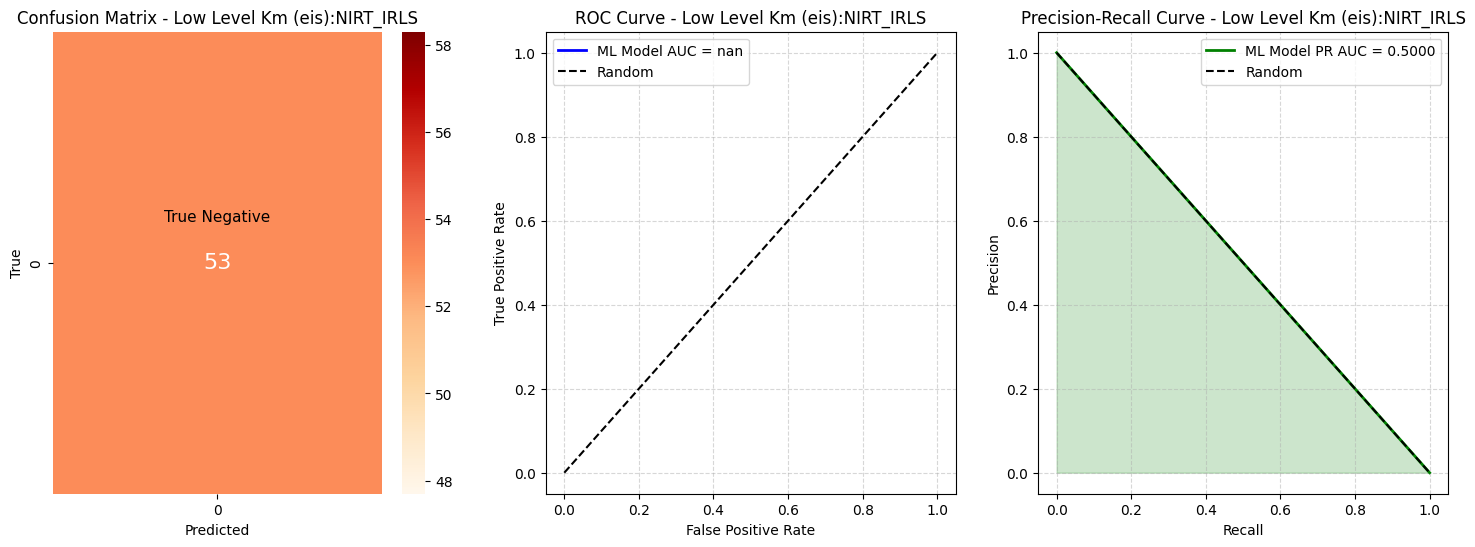

Classification Report - Low Level Km (eis):NIRT_IRLS

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

Sensitivity: 0.0000
Specificity: 0.0000
NPV: 0.0000
PPV: 0.0000
Accuracy: 1.0000
Cohen's Kappa: nan
Fowlkes-Mallows Score: 1.0000
Matthews Correlation Coefficient: 0.0000


C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, cohen_kappa_score, fowlkes_mallows_score, matthews_corrcoef, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_metrics(true_labels, predicted_labels):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure cm is at least 2x2
    if cm.shape == (1, 1):
        cm = np.array([[0, cm[0, 0]], [0, 0]])

    # True Positives, True Negatives, False Positives, False Negatives
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    # Sensitivity, Specificity, NPV, PPV
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    
    accuracy = accuracy_score(true_labels, predicted_labels)


    # Cohen's Kappa, Fowlkes-Mallows Score, Matthews Correlation Coefficient
    kappa = cohen_kappa_score(true_labels, predicted_labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, predicted_labels)
    matthews_corr = matthews_corrcoef(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    return sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1

def evaluate_model(true_labels, predicted_labels, variable_name):
    # Drop rows with NaN values in true_labels and predicted_labels
    non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
    true_labels = true_labels[non_nan_mask]
    predicted_labels = predicted_labels[non_nan_mask]

    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='', cmap='OrRd', annot_kws={"size": 16}, ax=axes[0])

     
    # Add labels for True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN)
    axes[0].text(0.5, 0.4, 'True Negative', ha='center', va='center', fontsize=11, color='black')
    #axes[0].text(0.5, 1.4, 'False Negative', ha='center', va='center', fontsize=11, color='black')
    #axes[0].text(1.5, 0.4, 'False Positive', ha='center', va='center', fontsize=11, color='black')
    #axes[0].text(1.5, 1.4, 'True Positive', ha='center', va='center', fontsize=11, color='black')


    axes[0].set_title(f'Confusion Matrix - {variable_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
    auc_value = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'ML Model AUC = {auc_value:.4f}', color='blue', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - {variable_name}')
    axes[1].legend()
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='blue')

    # PR Curve
    precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
    axes[2].plot(recall, precision, label=f'ML Model PR AUC = {auc(recall, precision):.4f}', color='green', linewidth=2)
    axes[2].plot([0, 1], [1, 0], 'k--', label='Random')
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title(f'Precision-Recall Curve - {variable_name}')
    axes[2].legend()
    axes[2].fill_between(recall, precision, alpha=0.2, color='green')

    plt.show()

    # Classification Report
    print(f'Classification Report - {variable_name}\n')
    print(classification_report(true_labels, predicted_labels))
    
   # Metrics
    sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1 = calculate_metrics(true_labels, predicted_labels)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'NPV: {npv:.4f}')
    print(f'PPV: {ppv:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Cohen\'s Kappa: {kappa:.4f}')
    print(f'Fowlkes-Mallows Score: {fowlkes_mallows:.4f}')
    print(f'Matthews Correlation Coefficient: {matthews_corr:.4f}')
    print(f'F1 Score: {f1:.4f}')



# Gold Standard vs ML Model for Low Level Resistance to Isoniazid
evaluate_model(df_3['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m'], df_3['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'], 'Low Level Km (eis):NIRT_IRLS')


C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\harshvats\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\harshvats\AppData\Local\Temp\ipykernel_22584\2903851458.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  axes[0].plot([0, 1], [0, 1], 'k--', label='Random', linestyle='--', color='gray')
C:\Users\harshvats\AppData\Local\Temp\ipykernel_22584\2903851458.py:23: UserWarning: color is redund

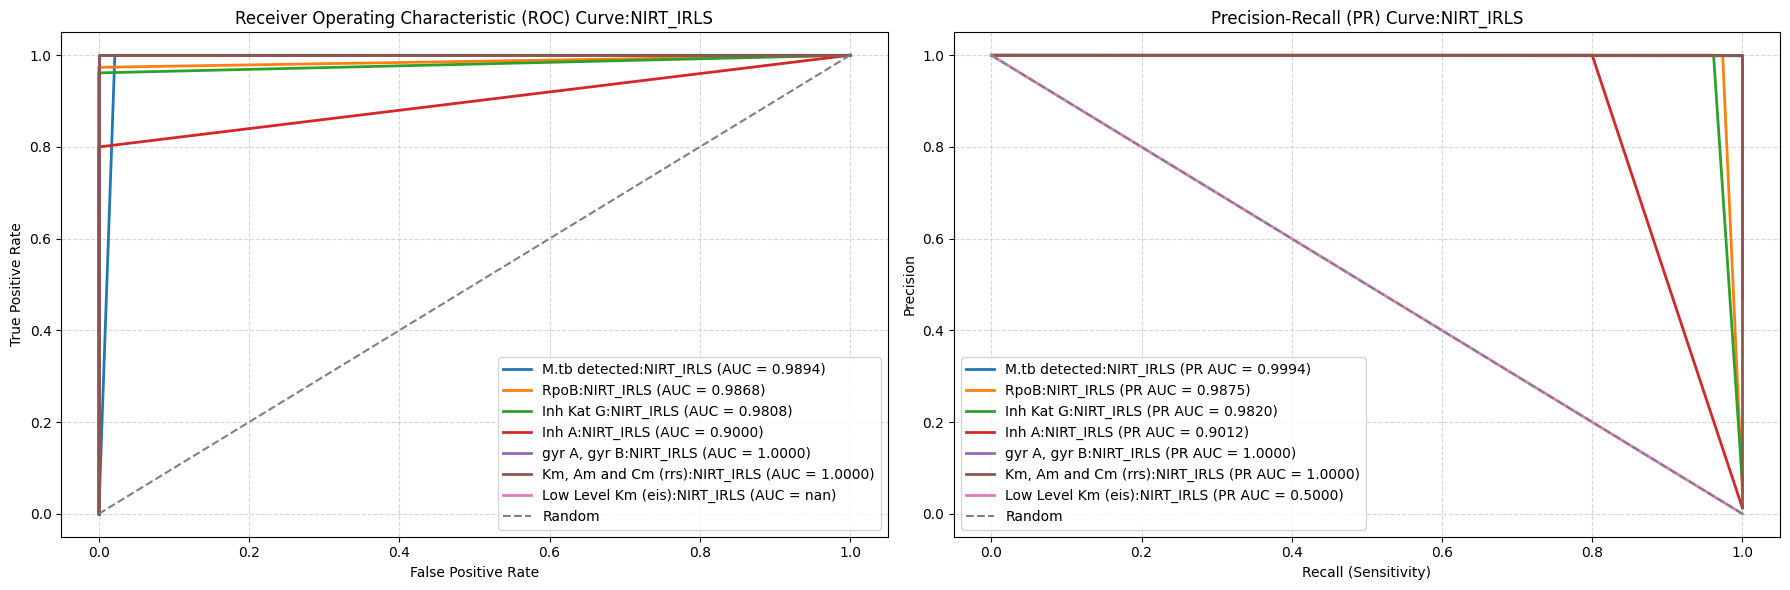

In [ ]:
import numpy as np

def evaluate_model(true_labels_list, predicted_labels_list, variable_names):
    # Create a subplot with 1 row and 2 columns for ROC and PR curves
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    for true_labels, predicted_labels, variable_name in zip(true_labels_list, predicted_labels_list, variable_names):
        # Remove NaN values from true_labels and predicted_labels
        non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
        true_labels_non_nan = true_labels[non_nan_mask]
        predicted_labels_non_nan = predicted_labels[non_nan_mask]

        # ROC Curve
        fpr, tpr, thresholds = roc_curve(true_labels_non_nan, predicted_labels_non_nan)
        auc_value = auc(fpr, tpr)
        axes[0].plot(fpr, tpr, label=f'{variable_name} (AUC = {auc_value:.4f})', linewidth=2)

        # PR Curve
        precision, recall, _ = precision_recall_curve(true_labels_non_nan, predicted_labels_non_nan)
        axes[1].plot(recall, precision, label=f'{variable_name} (PR AUC = {auc(recall, precision):.4f})', linewidth=2)

    # Set labels and title for ROC Curve
    axes[0].plot([0, 1], [0, 1], 'k--', label='Random', linestyle='--', color='gray')
    axes[0].grid(True, linestyle='--', alpha=0.5)
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve:NIRT_IRLS')
    axes[0].legend()

    # Set labels and title for PR Curve
    axes[1].plot([0, 1], [1, 0], 'k--', label='Random', linestyle='--', color='gray')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('Recall (Sensitivity)')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision-Recall (PR) Curve:NIRT_IRLS')
    axes[1].legend()

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    plt.show()

# Example usage with multiple sets of true and predicted labels
evaluate_model(
    [df_2['Sample condition_ai'], df_2['Resistance to Rifampicin (RpoB)_m'], df_2['High Level Resistance to Isoniazid_m'], df_2['Low Level Resistance to Isoniazid_m'],
     df_3['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'], df_3['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'], df_3['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m']],
    [df_2['Sample condition_m'], df_2['Resistance to Rifampicin (RpoB)_ai'], df_2['High Level Resistance to Isoniazid_ai'], df_2['Low Level Resistance to Isoniazid_ai'],
     df_3['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'], df_3['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_ai'], df_3['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai']],
    ['M.tb detected:NIRT_IRLS', 'RpoB:NIRT_IRLS', 'Inh Kat G:NIRT_IRLS', 'Inh A:NIRT_IRLS',
     'gyr A, gyr B:NIRT_IRLS', 'Km, Am and Cm (rrs):NIRT_IRLS', 'Low Level Km (eis):NIRT_IRLS']
)


In [ ]:

#Prashant IRL 5 states

#importing IRL 5 states dataset
import pandas as pd

# Specify the file path
file_path = r"C:\Users\harshvats\Downloads\Prashant_labs_irl_merged.xlsx"

# Read the Excel file into a DataFrame
try:
    df_4 = pd.read_excel(file_path)

    # Display the variable headers
    variable_headers = df_4.columns.tolist()
    print("Variable Headers:")
    for header in variable_headers:
        print(header)

except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except pd.errors.EmptyDataError:
    print(f"The file at path {file_path} is empty.")
except pd.errors.ParserError as e:
    print(f"Error parsing Excel file: {e}")

Variable Headers:
Nikshay ID
Sample condition_m
Resistance to Rifampicin (RpoB)_m
High Level Resistance to Isoniazid_m
Low Level Resistance to Isoniazid_m
a
Sample condition_ai
Resistance to Rifampicin (RpoB)_ai
High Level Resistance to Isoniazid_ai
Low Level Resistance to Isoniazid_ai
Unnamed: 10
city


In [ ]:
print(df_4.columns)

Index(['Nikshay ID', 'Sample condition_m', 'Resistance to Rifampicin (RpoB)_m',
       'High Level Resistance to Isoniazid_m',
       'Low Level Resistance to Isoniazid_m', 'a', 'Sample condition_ai',
       'Resistance to Rifampicin (RpoB)_ai',
       'High Level Resistance to Isoniazid_ai',
       'Low Level Resistance to Isoniazid_ai', 'Unnamed: 10', 'city'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Sample condition_m', 'Resistance to Rifampicin (RpoB)_m',
                    'High Level Resistance to Isoniazid_m',
                    'Low Level Resistance to Isoniazid_m', 'a', 'Sample condition_ai',
                    'Resistance to Rifampicin (RpoB)_ai',
                    'High Level Resistance to Isoniazid_ai',
                    'Low Level Resistance to Isoniazid_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df_4[header].value_counts())
    print("\n")

Variable: Sample condition_m
Sample condition_m
M.tb detected: Rif and Inh Sensitive    202
M.tb detected: Send for SL-LPA           69
M.tb not detected: Send for Culture      13
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_m
Resistance to Rifampicin (RpoB)_m
Not Detected    224
Inferred         24
Detected         23
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid_m
High Level Resistance to Isoniazid_m
Not Detected    231
Detected         33
Inferred          7
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid_m
Low Level Resistance to Isoniazid_m
Not Detected    239
Detected         28
Inferred          4
Name: count, dtype: int64


Variable: a
Series([], Name: count, dtype: int64)


Variable: Sample condition_ai
Sample condition_ai
M.tb detected: Rif and Inh Sensitive    202
M.tb detected: Send for SL-LPA           69
M.tb not detected: Send for Culture      13
Name: count, dtype: int64


Variable: Resistance t

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'Sample condition_AI' is the variable
df_4['Sample condition_m'] = df_4['Sample condition_m'].replace({
    'M.tb detected: Rif and Inh Sensitive': 'M.tb detected',
    'M.tb detected: Send for SL-LPA': 'M.tb detected',
})

# Check the updated frequency count for 'Sample condition_AI'
print("Variable: Sample condition_m")
print(df_4['Sample condition_m'].value_counts())

Variable: Sample condition_m
Sample condition_m
M.tb detected                          271
M.tb not detected: Send for Culture     13
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'Sample condition_AI' is the variable
df_4['Sample condition_ai'] = df_4['Sample condition_ai'].replace({
    'M.tb detected: Rif and Inh Sensitive': 'M.tb detected',
    'M.tb detected: Send for SL-LPA': 'M.tb detected',
})

# Check the updated frequency count for 'Sample condition_AI'
print("Variable: Sample condition_ai")
print(df_4['Sample condition_ai'].value_counts())

Variable: Sample condition_ai
Sample condition_ai
M.tb detected                          271
M.tb not detected: Send for Culture     13
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and the specified variables are present
variables_to_merge = ['Resistance to Rifampicin (RpoB)_m',
                    'High Level Resistance to Isoniazid_m',
                    'Low Level Resistance to Isoniazid_m', 
                    'Resistance to Rifampicin (RpoB)_ai',
                    'High Level Resistance to Isoniazid_ai',
                    'Low Level Resistance to Isoniazid_ai']

for variable in variables_to_merge:
    df_4[variable] = df_4[variable].replace({
        'Detected': 'Detected/Inferred',
        'Inferred': 'Detected/Inferred'
    })

    # Print the updated frequency count for the variable
    print(f"Variable: {variable}")
    print(df_4[variable].value_counts())
    print("\n")

Variable: Resistance to Rifampicin (RpoB)_m
Resistance to Rifampicin (RpoB)_m
Not Detected         224
Detected/Inferred     47
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid_m
High Level Resistance to Isoniazid_m
Not Detected         231
Detected/Inferred     40
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid_m
Low Level Resistance to Isoniazid_m
Not Detected         239
Detected/Inferred     32
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_ai
Resistance to Rifampicin (RpoB)_ai
Not Detected         225
Detected/Inferred     46
-7                     1
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid_ai
High Level Resistance to Isoniazid_ai
Not Detected         230
Detected/Inferred     40
Not detected           1
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid_ai
Low Level Resistance to Isoniazid_ai
Not Detected         235
Detected/Inferred     36
Name: count, dty

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and the specified variable is present
variable_to_merge = 'High Level Resistance to Isoniazid_ai'

# Merge "Not Detected" and "Not detected" into "Not Detected"
df_4[variable_to_merge] = df_4[variable_to_merge].replace({
    'Not Detected': 'Not Detected',
    'Not detected': 'Not Detected'
})

# Print the updated frequency count for the variable
print(f"Variable: {variable_to_merge}")
print(df_4[variable_to_merge].value_counts())
print("\n")

Variable: High Level Resistance to Isoniazid_ai
High Level Resistance to Isoniazid_ai
Not Detected         231
Detected/Inferred     40
Name: count, dtype: int64




In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Sample condition_m', 'Resistance to Rifampicin (RpoB)_m',
                    'High Level Resistance to Isoniazid_m',
                    'Low Level Resistance to Isoniazid_m', 'a', 'Sample condition_ai',
                    'Resistance to Rifampicin (RpoB)_ai',
                    'High Level Resistance to Isoniazid_ai',
                    'Low Level Resistance to Isoniazid_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df_4[header].value_counts())
    print("\n")

Variable: Sample condition_m
Sample condition_m
M.tb detected                          271
M.tb not detected: Send for Culture     13
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_m
Resistance to Rifampicin (RpoB)_m
Not Detected         224
Detected/Inferred     47
Name: count, dtype: int64


Variable: High Level Resistance to Isoniazid_m
High Level Resistance to Isoniazid_m
Not Detected         231
Detected/Inferred     40
Name: count, dtype: int64


Variable: Low Level Resistance to Isoniazid_m
Low Level Resistance to Isoniazid_m
Not Detected         239
Detected/Inferred     32
Name: count, dtype: int64


Variable: a
Series([], Name: count, dtype: int64)


Variable: Sample condition_ai
Sample condition_ai
M.tb detected                          271
M.tb not detected: Send for Culture     13
Name: count, dtype: int64


Variable: Resistance to Rifampicin (RpoB)_ai
Resistance to Rifampicin (RpoB)_ai
Not Detected         225
Detected/Inferred     46
-7            

In [ ]:
# Replace values in Sample condition_AI
df_4['Sample condition_m'] = df_4['Sample condition_m'].replace({
    'M.tb not detected: Send for Culture': 0,
    'M.tb detected': 1
})

# Replace values in Resistance to Rifampicin (RpoB)_AI
df_4['Resistance to Rifampicin (RpoB)_m'] = df_4['Resistance to Rifampicin (RpoB)_m'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_AI
df_4['High Level Resistance to Isoniazid_m'] = df_4['High Level Resistance to Isoniazid_m'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in Low Level Resistance to Isoniazid_AI
df_4['Low Level Resistance to Isoniazid_m'] = df_4['Low Level Resistance to Isoniazid_m'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in Sample condition_M
df_4['Sample condition_ai'] = df_4['Sample condition_ai'].replace({
    'M.tb not detected: Send for Culture': 0,
    'M.tb detected': 1
})

# Replace values in Resistance to Rifampicin (RpoB)_M
df_4['Resistance to Rifampicin (RpoB)_ai'] = df_4['Resistance to Rifampicin (RpoB)_ai'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_M
df_4['High Level Resistance to Isoniazid_ai'] = df_4['High Level Resistance to Isoniazid_ai'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in Low Level Resistance to Isoniazid_M
df_4['Low Level Resistance to Isoniazid_ai'] = df_4['Low Level Resistance to Isoniazid_ai'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Print the updated DataFrame
print(df_4)


     Nikshay ID  Sample condition_m  Resistance to Rifampicin (RpoB)_m  \
0           2.0                 1.0                                0.0   
1           4.0                 1.0                                0.0   
2           5.0                 1.0                                0.0   
3           6.0                 1.0                                0.0   
4           7.0                 1.0                                0.0   
..          ...                 ...                                ...   
292         NaN                 NaN                                NaN   
293         NaN                 NaN                                NaN   
294         NaN                 NaN                                NaN   
295         NaN                 NaN                                NaN   
296         NaN                 NaN                                NaN   

     High Level Resistance to Isoniazid_m  \
0                                     0.0   
1                    

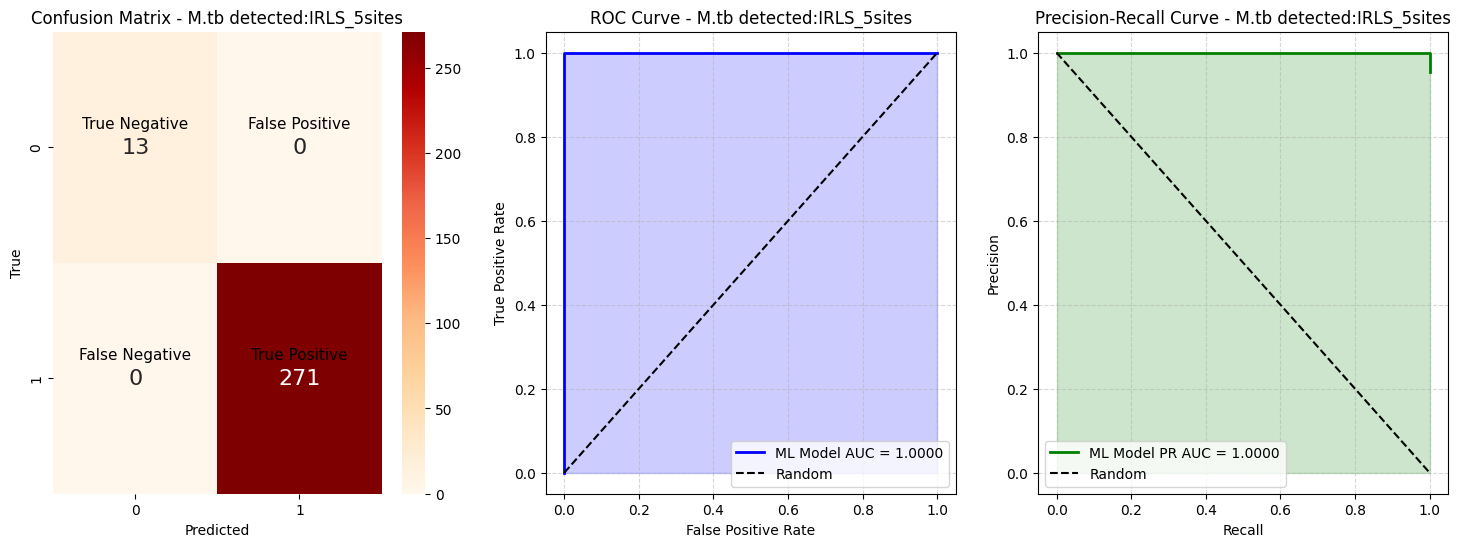

Classification Report - M.tb detected:IRLS_5sites

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00       271

    accuracy                           1.00       284
   macro avg       1.00      1.00      1.00       284
weighted avg       1.00      1.00      1.00       284

Sensitivity: 1.0000
Specificity: 1.0000
NPV: 1.0000
PPV: 1.0000
Accuracy: 1.0000
Cohen's Kappa: 1.0000
Fowlkes-Mallows Score: 1.0000
Matthews Correlation Coefficient: 1.0000


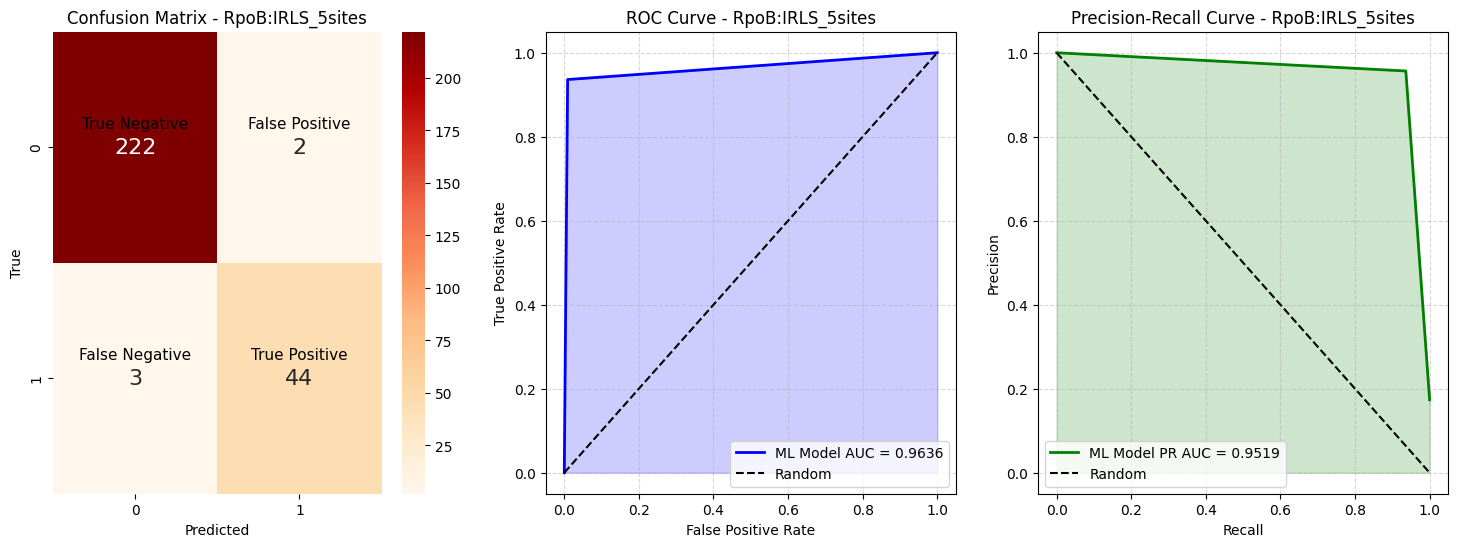

Classification Report - RpoB:IRLS_5sites

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       224
         1.0       0.96      0.94      0.95        47

    accuracy                           0.98       271
   macro avg       0.97      0.96      0.97       271
weighted avg       0.98      0.98      0.98       271

Sensitivity: 0.9362
Specificity: 0.9911
NPV: 0.9867
PPV: 0.9565
Accuracy: 0.9815
Cohen's Kappa: 0.9351
Fowlkes-Mallows Score: 0.9746
Matthews Correlation Coefficient: 0.9352


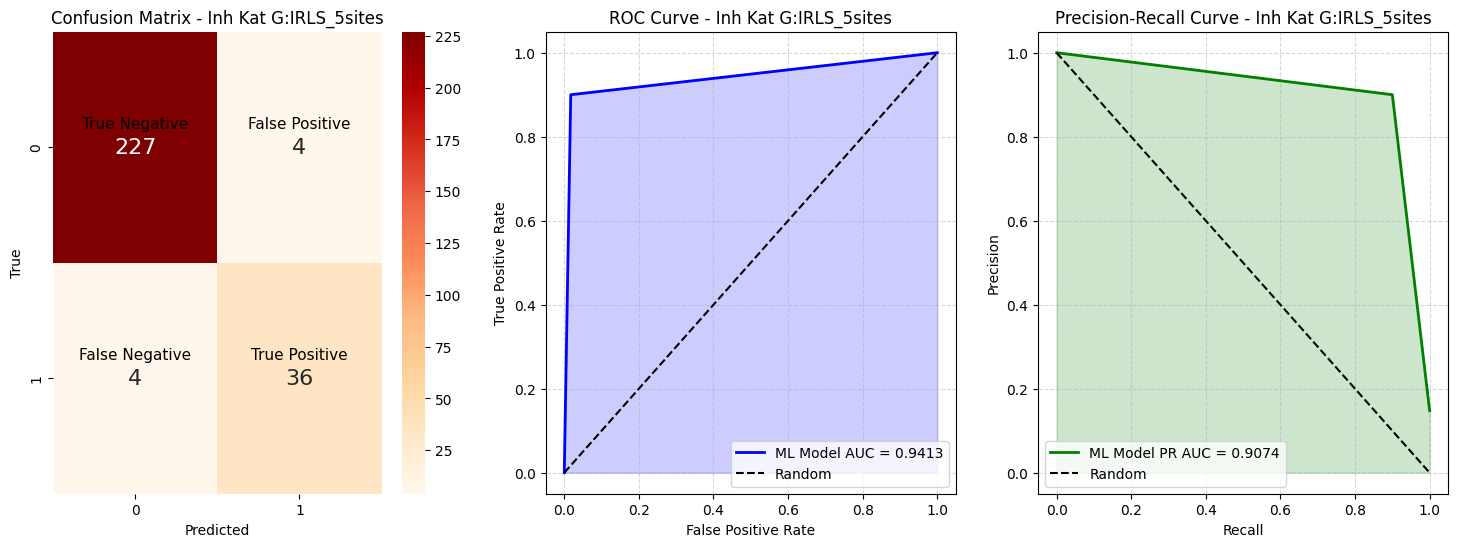

Classification Report - Inh Kat G:IRLS_5sites

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       231
         1.0       0.90      0.90      0.90        40

    accuracy                           0.97       271
   macro avg       0.94      0.94      0.94       271
weighted avg       0.97      0.97      0.97       271

Sensitivity: 0.9000
Specificity: 0.9827
NPV: 0.9827
PPV: 0.9000
Accuracy: 0.9705
Cohen's Kappa: 0.8827
Fowlkes-Mallows Score: 0.9615
Matthews Correlation Coefficient: 0.8827


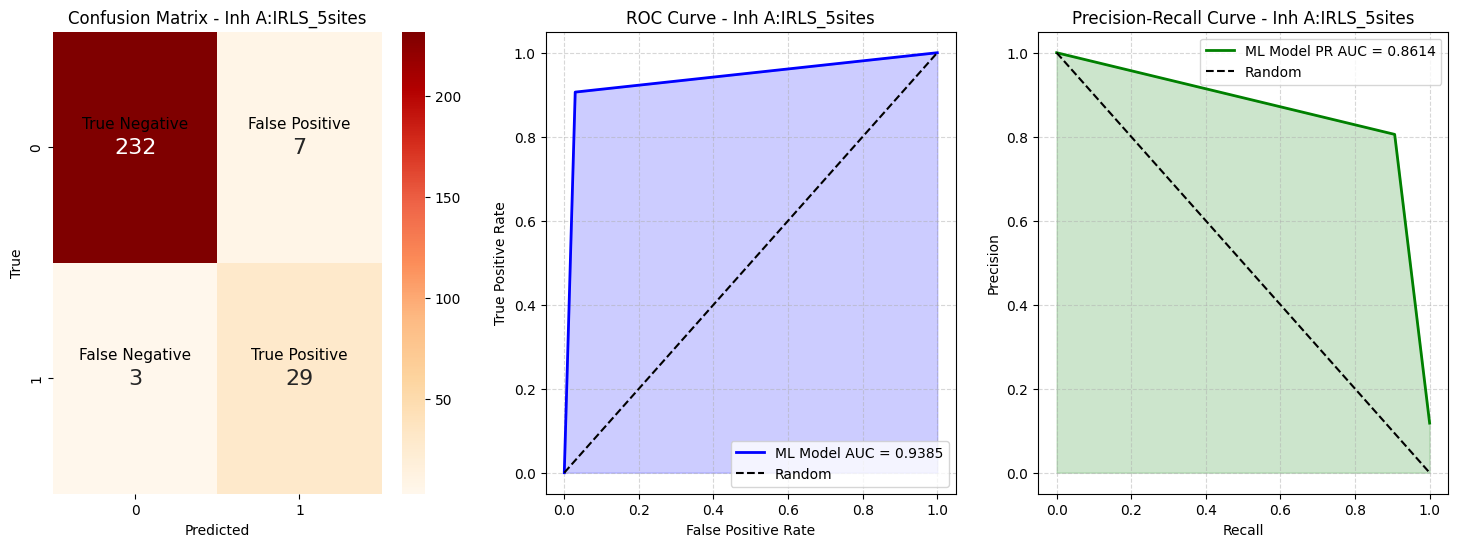

Classification Report - Inh A:IRLS_5sites

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       239
         1.0       0.81      0.91      0.85        32

    accuracy                           0.96       271
   macro avg       0.90      0.94      0.92       271
weighted avg       0.97      0.96      0.96       271

Sensitivity: 0.9062
Specificity: 0.9707
NPV: 0.9872
PPV: 0.8056
Accuracy: 0.9631
Cohen's Kappa: 0.8319
Fowlkes-Mallows Score: 0.9544
Matthews Correlation Coefficient: 0.8338


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, cohen_kappa_score, fowlkes_mallows_score, matthews_corrcoef, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def calculate_metrics(true_labels, predicted_labels):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure cm is at least 2x2
    if cm.shape == (1, 1):
        cm = np.array([[0, cm[0, 0]], [0, 0]])

    # True Positives, True Negatives, False Positives, False Negatives
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    # Sensitivity, Specificity, NPV, PPV
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Cohen's Kappa, Fowlkes-Mallows Score, Matthews Correlation Coefficient
    kappa = cohen_kappa_score(true_labels, predicted_labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, predicted_labels)
    matthews_corr = matthews_corrcoef(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    return sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr

def evaluate_model(true_labels, predicted_labels, variable_name):
    # Drop rows with NaN values in true_labels and predicted_labels
    non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
    true_labels = true_labels[non_nan_mask]
    predicted_labels = predicted_labels[non_nan_mask]

    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='', cmap='OrRd', annot_kws={"size": 16}, ax=axes[0])

     
    # Add labels for True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN)
    axes[0].text(0.5, 0.4, 'True Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(0.5, 1.4, 'False Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 0.4, 'False Positive', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 1.4, 'True Positive', ha='center', va='center', fontsize=11, color='black')


    axes[0].set_title(f'Confusion Matrix - {variable_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
    auc_value = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'ML Model AUC = {auc_value:.4f}', color='blue', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - {variable_name}')
    axes[1].legend()
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='blue')

    # PR Curve
    precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
    axes[2].plot(recall, precision, label=f'ML Model PR AUC = {auc(recall, precision):.4f}', color='green', linewidth=2)
    axes[2].plot([0, 1], [1, 0], 'k--', label='Random')
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title(f'Precision-Recall Curve - {variable_name}')
    axes[2].legend()
    axes[2].fill_between(recall, precision, alpha=0.2, color='green')

    plt.show()

    # Classification Report
    print(f'Classification Report - {variable_name}\n')
    print(classification_report(true_labels, predicted_labels))
    
   # Metrics
    sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1 = calculate_metrics(true_labels, predicted_labels)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'NPV: {npv:.4f}')
    print(f'PPV: {ppv:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Cohen\'s Kappa: {kappa:.4f}')
    print(f'Fowlkes-Mallows Score: {fowlkes_mallows:.4f}')
    print(f'Matthews Correlation Coefficient: {matthews_corr:.4f}')
    print(f'F1 Score: {f1:.4f}')


# Gold Standard vs ML Model for Sample condition
evaluate_model(df_4['Sample condition_ai'], df_4['Sample condition_m'], 'M.tb detected:IRLS_5sites')

# Gold Standard vs ML Model for Resistance to Rifampicin (RpoB)
evaluate_model(df_4['Resistance to Rifampicin (RpoB)_m'], df_4['Resistance to Rifampicin (RpoB)_ai'], 'RpoB:IRLS_5sites')

# Gold Standard vs ML Model for High Level Resistance to Isoniazid
evaluate_model(df_4['High Level Resistance to Isoniazid_m'], df_4['High Level Resistance to Isoniazid_ai'], 'Inh Kat G:IRLS_5sites')

# Gold Standard vs ML Model for Low Level Resistance to Isoniazid
evaluate_model(df_4['Low Level Resistance to Isoniazid_m'], df_4['Low Level Resistance to Isoniazid_ai'], 'Inh A:IRLS_5sites')



In [ ]:
#Prashant IRL 5 states

#importing IRL 5 states dataset
import pandas as pd

# Specify the file path
file_path = r"C:\Users\harshvats\Downloads\Prashant_SP_LPA_merged.xlsx"

# Read the Excel file into a DataFrame
try:
    df_5 = pd.read_excel(file_path)

    # Display the variable headers
    variable_headers = df_5.columns.tolist()
    print("Variable Headers:")
    for header in variable_headers:
        print(header)

except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except pd.errors.EmptyDataError:
    print(f"The file at path {file_path} is empty.")
except pd.errors.ParserError as e:
    print(f"Error parsing Excel file: {e}")

Variable Headers:
Nikshay ID
Sample condition_m
Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m
a
Sample condition_ai
Resistance to Fluoroquinolones: (gyr A, gyr B)_ai
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai
Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai
Unnamed: 10
Unnamed: 11
city


In [ ]:
print(df_5.columns)

Index(['Nikshay ID', 'Sample condition_m',
       'Resistance to Fluoroquinolones: (gyr A, gyr B)_m',
       'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m',
       'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m',
       'a', 'Sample condition_ai',
       'Resistance to Fluoroquinolones: (gyr A, gyr B)_ai',
       'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai',
       'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai',
       'Unnamed: 10', 'Unnamed: 11', 'city'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Sample condition_m',
                    'Resistance to Fluoroquinolones: (gyr A, gyr B)_m',
                    'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m',
                    'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m',
                    'Sample condition_ai',
                    'Resistance to Fluoroquinolones: (gyr A, gyr B)_ai',
                    'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai',
                    'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df_5[header].value_counts())
    print("\n")

Variable: Sample condition_m
Sample condition_m
M.tb detected: All Sensitive                   44
M.tb detected: FLQ resistant, SLI sensitive    27
Indeterminate: Repeat SL-LPA                    6
Invalid: Repeat SL-LPA                          5
M.tb not detected: Send for Culture             3
M.tb detected: FLQ resistant, SLI resistant     1
Name: count, dtype: int64


Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Not Detected    45
Detected        26
Inferred         4
Name: count, dtype: int64


Variable: Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance not detected    59
Detected                   16
Name: count, dtype: int64


Variable: Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m
Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m
Resistance not detected    64
Detected               

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and the specified variables are present
variables_to_merge = ['Resistance to Fluoroquinolones: (gyr A, gyr B)_m',
                      'Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'
]

for variable in variables_to_merge:
    df_5[variable] = df_5[variable].replace({
        'Detected': 'Detected/Inferred',
        'Inferred': 'Detected/Inferred',
   })
    # Print the updated frequency count for the variable
    print(f"Variable: {variable}")
    print(df_5[variable].value_counts())
    print("\n")

Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Not Detected         45
Detected/Inferred    30
Name: count, dtype: int64


Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_ai
Resistance to Fluoroquinolones: (gyr A, gyr B)_ai
Not Detected         38
Detected/Inferred    37
Name: count, dtype: int64




In [ ]:
import pandas as pd

# Assuming df is your DataFrame and the specified variables are present
variables_to_merge = ['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai'
]

for variable in variables_to_merge:
    df_5[variable] = df_5[variable].replace({
        'Resistance Not detected': 'Resistance not detected',
    })
    # Print the updated frequency count for the variable
    print(f"Variable: {variable}")
    print(df_5[variable].value_counts())
    print("\n")

Variable: Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai
Resistance not detected    59
Detected                   16
Name: count, dtype: int64




In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the variables
# Replace 'Nikshay Id_m', 'Sample condition_AI', etc. with your actual variable names
variable_headers = ['Sample condition_m',
                    'Resistance to Fluoroquinolones: (gyr A, gyr B)_m',
                    'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m',
                    'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m',
                    'Sample condition_ai',
                    'Resistance to Fluoroquinolones: (gyr A, gyr B)_ai',
                    'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai',
                    'Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai']

# Calculate frequency count for each variable
for header in variable_headers:
    print(f"Variable: {header}")
    print(df_5[header].value_counts())
    print("\n")

Variable: Sample condition_m
Sample condition_m
M.tb detected: All Sensitive                   44
M.tb detected: FLQ resistant, SLI sensitive    27
Indeterminate: Repeat SL-LPA                    6
Invalid: Repeat SL-LPA                          5
M.tb not detected: Send for Culture             3
M.tb detected: FLQ resistant, SLI resistant     1
Name: count, dtype: int64


Variable: Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Resistance to Fluoroquinolones: (gyr A, gyr B)_m
Not Detected         45
Detected/Inferred    30
Name: count, dtype: int64


Variable: Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m
Resistance not detected    59
Detected                   16
Name: count, dtype: int64


Variable: Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m
Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m
Resistance not detected    64
Detected                   11
Na

In [ ]:
# Replace values in Sample condition_AI


# Replace values in Resistance to Rifampicin (RpoB)_AI
df_5['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'] = df_5['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_AI
df_5['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'] = df_5['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'].replace({
    'Resistance not detected': 0,
    'Detected': 1
})

# Replace values in Low Level Resistance to Isoniazid_AI
df_5['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m'] = df_5['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m'].replace({
    'Resistance not detected': 0,
    'Detected': 1
})

# Replace values in Resistance to Rifampicin (RpoB)_M
df_5['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'] = df_5['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'].replace({
    'Not Detected': 0,
    'Detected/Inferred': 1
})

# Replace values in High Level Resistance to Isoniazid_M
df_5[ 'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai'] = df_5[ 'Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai'].replace({
    'Resistance not detected': 0,
    'Detected': 1
})

# Replace values in Low Level Resistance to Isoniazid_M
df_5['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'] = df_5['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'].replace({
    'Resistance not detected': 0,
    'Detected': 1
})

# Print the updated DataFrame
print(df_5)

   Nikshay ID            Sample condition_m  \
0        5951  M.tb detected: All Sensitive   
1       10177  M.tb detected: All Sensitive   
2       10179  M.tb detected: All Sensitive   
3        9971  M.tb detected: All Sensitive   
4        9976  M.tb detected: All Sensitive   
..        ...                           ...   
88        NaN                           NaN   
89        NaN                           NaN   
90        NaN                           NaN   
91        NaN                           NaN   
92        NaN                           NaN   

    Resistance to Fluoroquinolones: (gyr A, gyr B)_m  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
..                                               ...   
88                                         

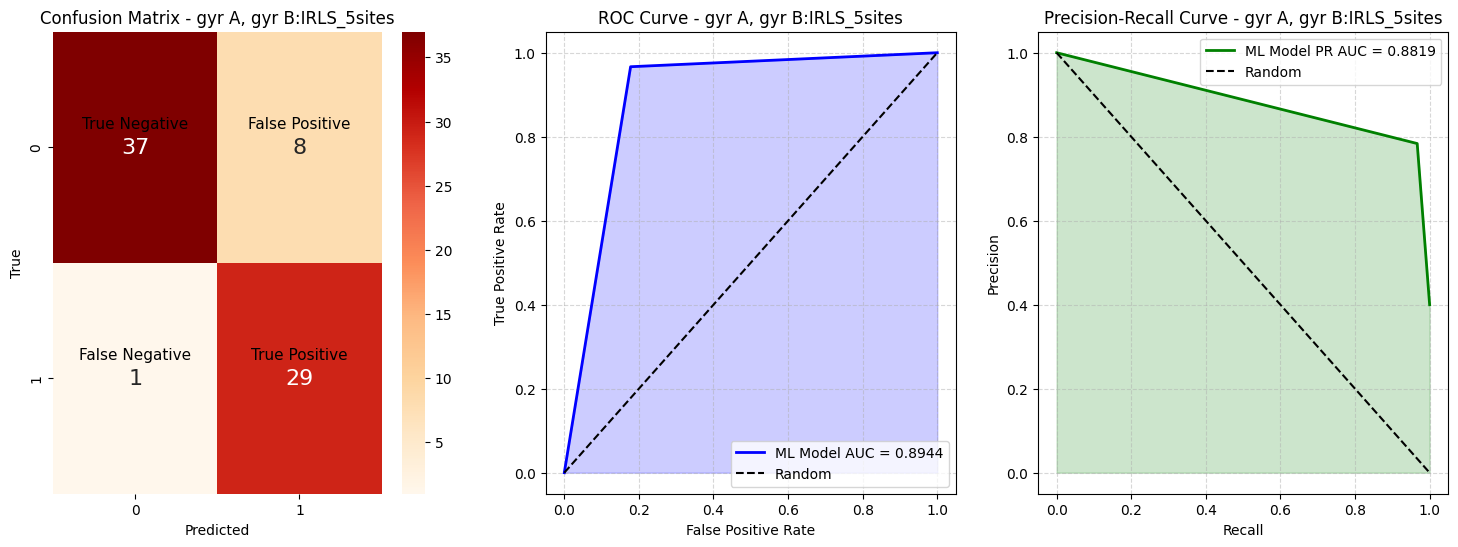

Classification Report - gyr A, gyr B:IRLS_5sites

              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89        45
         1.0       0.78      0.97      0.87        30

    accuracy                           0.88        75
   macro avg       0.88      0.89      0.88        75
weighted avg       0.90      0.88      0.88        75

Sensitivity: 0.9667
Specificity: 0.8222
NPV: 0.9737
PPV: 0.7838
Accuracy: 0.8800
Cohen's Kappa: 0.7594
Fowlkes-Mallows Score: 0.7876
Matthews Correlation Coefficient: 0.7730


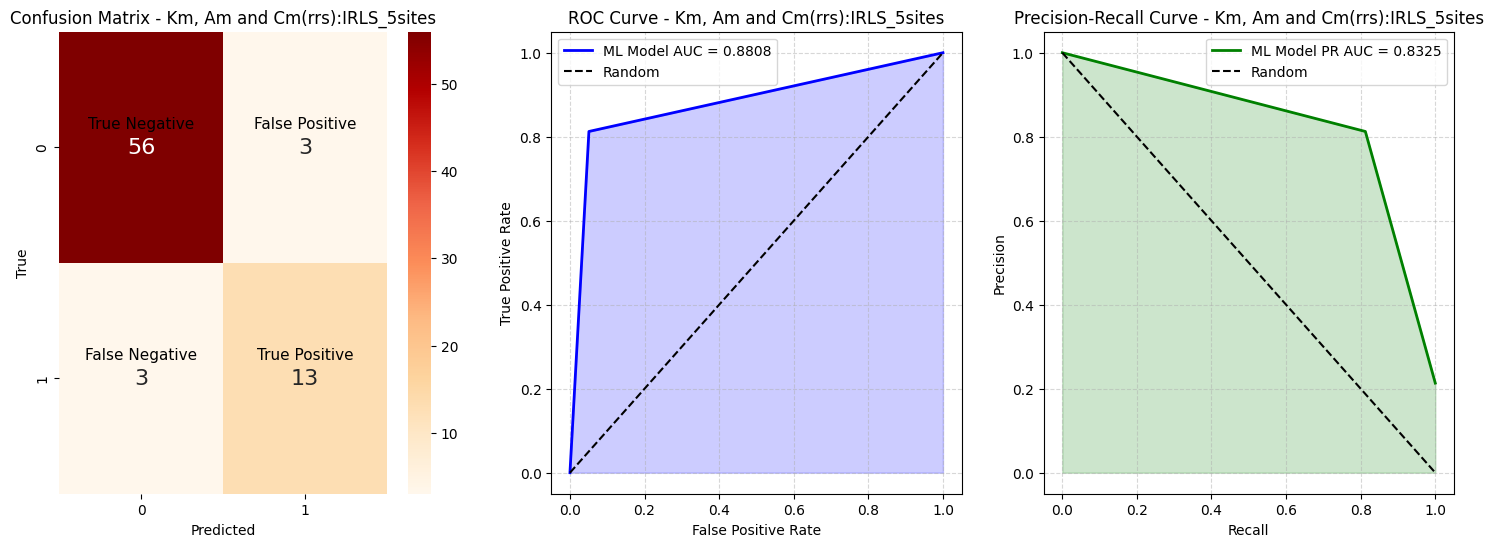

Classification Report - Km, Am and Cm(rrs):IRLS_5sites

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        59
         1.0       0.81      0.81      0.81        16

    accuracy                           0.92        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.92      0.92      0.92        75

Sensitivity: 0.8125
Specificity: 0.9492
NPV: 0.9492
PPV: 0.8125
Accuracy: 0.9200
Cohen's Kappa: 0.7617
Fowlkes-Mallows Score: 0.8869
Matthews Correlation Coefficient: 0.7617


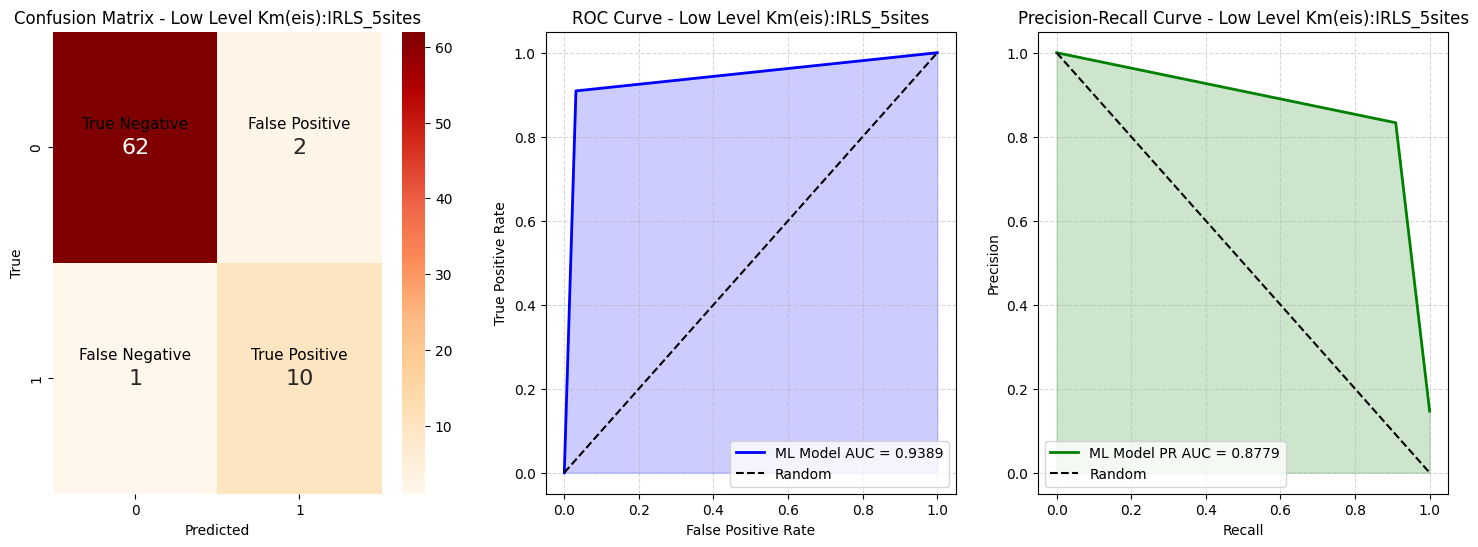

Classification Report - Low Level Km(eis):IRLS_5sites

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98        64
         1.0       0.83      0.91      0.87        11

    accuracy                           0.96        75
   macro avg       0.91      0.94      0.92        75
weighted avg       0.96      0.96      0.96        75

Sensitivity: 0.9091
Specificity: 0.9688
NPV: 0.9841
PPV: 0.8333
Accuracy: 0.9600
Cohen's Kappa: 0.8460
Fowlkes-Mallows Score: 0.9473
Matthews Correlation Coefficient: 0.8471


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, cohen_kappa_score, fowlkes_mallows_score, matthews_corrcoef, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_metrics(true_labels, predicted_labels):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Ensure cm is at least 2x2
    if cm.shape == (1, 1):
        cm = np.array([[0, cm[0, 0]], [0, 0]])

    # True Positives, True Negatives, False Positives, False Negatives
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]

    # Sensitivity, Specificity, NPV, PPV
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Cohen's Kappa, Fowlkes-Mallows Score, Matthews Correlation Coefficient
    kappa = cohen_kappa_score(true_labels, predicted_labels)
    fowlkes_mallows = fowlkes_mallows_score(true_labels, predicted_labels)
    matthews_corr = matthews_corrcoef(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    return sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr

def evaluate_model(true_labels, predicted_labels, variable_name):
    # Drop rows with NaN values in true_labels and predicted_labels
    non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
    true_labels = true_labels[non_nan_mask]
    predicted_labels = predicted_labels[non_nan_mask]

    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='', cmap='OrRd', annot_kws={"size": 16}, ax=axes[0])

     
    # Add labels for True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN)
    axes[0].text(0.5, 0.4, 'True Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(0.5, 1.4, 'False Negative', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 0.4, 'False Positive', ha='center', va='center', fontsize=11, color='black')
    axes[0].text(1.5, 1.4, 'True Positive', ha='center', va='center', fontsize=11, color='black')


    axes[0].set_title(f'Confusion Matrix - {variable_name}')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
    auc_value = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'ML Model AUC = {auc_value:.4f}', color='blue', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve - {variable_name}')
    axes[1].legend()
    axes[1].fill_between(fpr, tpr, alpha=0.2, color='blue')

    # PR Curve
    precision, recall, _ = precision_recall_curve(true_labels, predicted_labels)
    axes[2].plot(recall, precision, label=f'ML Model PR AUC = {auc(recall, precision):.4f}', color='green', linewidth=2)
    axes[2].plot([0, 1], [1, 0], 'k--', label='Random')
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title(f'Precision-Recall Curve - {variable_name}')
    axes[2].legend()
    axes[2].fill_between(recall, precision, alpha=0.2, color='green')

    plt.show()

    # Classification Report
    print(f'Classification Report - {variable_name}\n')
    print(classification_report(true_labels, predicted_labels))
    
   # Metrics
    sensitivity, specificity, npv, ppv, accuracy, kappa, fowlkes_mallows, matthews_corr, f1 = calculate_metrics(true_labels, predicted_labels)
    print(f'Sensitivity: {sensitivity:.4f}')
    print(f'Specificity: {specificity:.4f}')
    print(f'NPV: {npv:.4f}')
    print(f'PPV: {ppv:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Cohen\'s Kappa: {kappa:.4f}')
    print(f'Fowlkes-Mallows Score: {fowlkes_mallows:.4f}')
    print(f'Matthews Correlation Coefficient: {matthews_corr:.4f}')
    print(f'F1 Score: {f1:.4f}')


# Gold Standard vs ML Model for Resistance to Rifampicin (RpoB)
evaluate_model(df_5['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'], df_5['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'], 'gyr A, gyr B:IRLS_5sites')

# Gold Standard vs ML Model for High Level Resistance to Isoniazid
evaluate_model(df_5['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'], df_5['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai'], 'Km, Am and Cm(rrs):IRLS_5sites')

# Gold Standard vs ML Model for Low Level Resistance to Isoniazid
evaluate_model(df_5['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m'], df_5['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai'], 'Low Level Km(eis):IRLS_5sites')


C:\Users\harshvats\AppData\Local\Temp\ipykernel_22584\228233860.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  axes[0].plot([0, 1], [0, 1], 'k--', label='Random', linestyle='--', color='gray')
C:\Users\harshvats\AppData\Local\Temp\ipykernel_22584\228233860.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0].plot([0, 1], [0, 1], 'k--', label='Random', linestyle='--', color='gray')
C:\Users\harshvats\AppData\Local\Temp\ipykernel_22584\228233860.py:31: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  axes[1].plot([0, 1], [1, 0], 'k--', label='Random', linestyle='--', color='gray')
C:\Users\harshvats\AppData\Local\Te

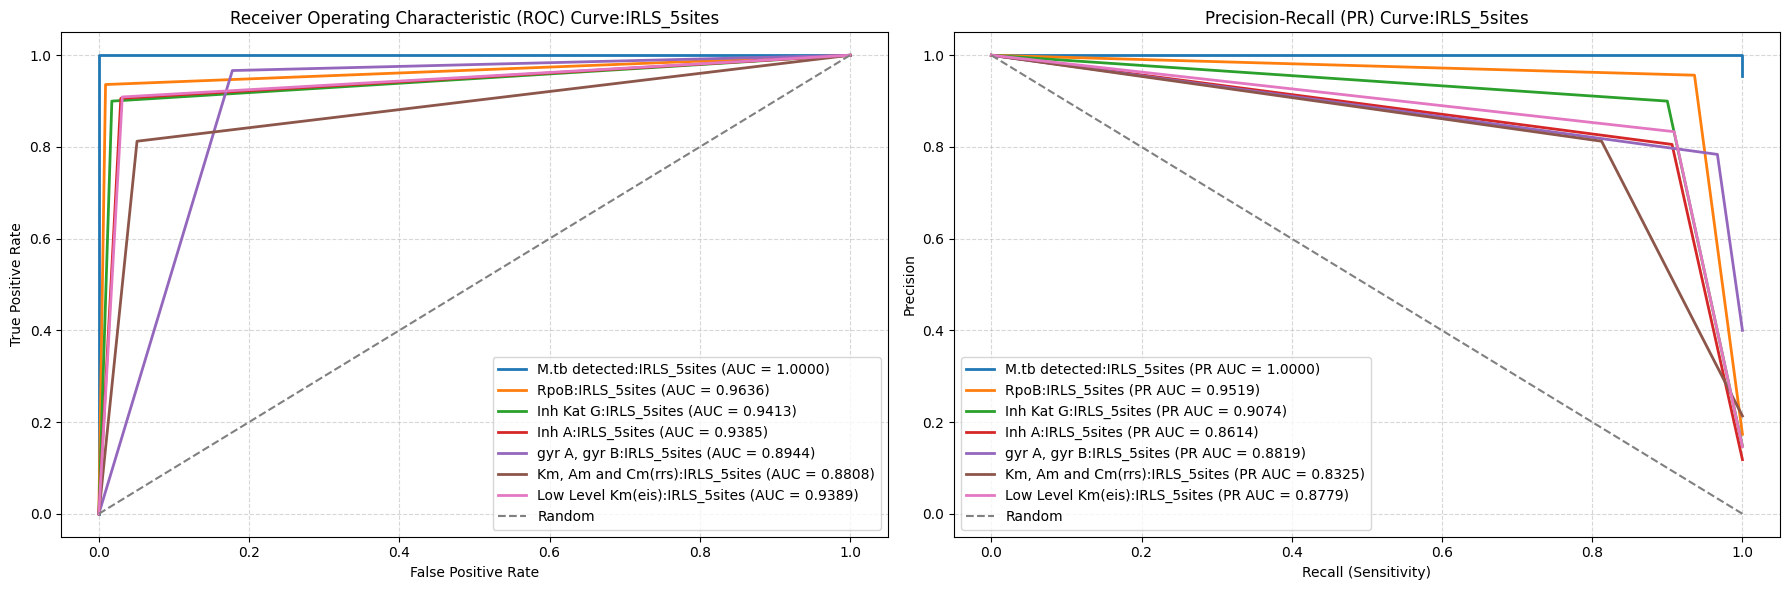

: 

In [ ]:
import numpy as np

def evaluate_multiple_models(true_labels_list, predicted_labels_list, variable_names, title_prefix):
    # Create a subplot with 1 row and 2 columns for ROC and PR curves
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    for true_labels, predicted_labels, variable_name in zip(true_labels_list, predicted_labels_list, variable_names):
        # Remove NaN values from true_labels and predicted_labels
        non_nan_mask = ~np.isnan(true_labels) & ~np.isnan(predicted_labels)
        true_labels_non_nan = true_labels[non_nan_mask]
        predicted_labels_non_nan = predicted_labels[non_nan_mask]

        # ROC Curve
        fpr, tpr, thresholds = roc_curve(true_labels_non_nan, predicted_labels_non_nan)
        auc_value = auc(fpr, tpr)
        axes[0].plot(fpr, tpr, label=f'{variable_name} (AUC = {auc_value:.4f})', linewidth=2)

        # PR Curve
        precision, recall, _ = precision_recall_curve(true_labels_non_nan, predicted_labels_non_nan)
        axes[1].plot(recall, precision, label=f'{variable_name} (PR AUC = {auc(recall, precision):.4f})', linewidth=2)

    # Set labels and title for ROC Curve
    axes[0].plot([0, 1], [0, 1], 'k--', label='Random', linestyle='--', color='gray')
    axes[0].grid(True, linestyle='--', alpha=0.5)
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve:IRLS_5sites')
    axes[0].legend()

    # Set labels and title for PR Curve
    axes[1].plot([0, 1], [1, 0], 'k--', label='Random', linestyle='--', color='gray')
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlabel('Recall (Sensitivity)')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision-Recall (PR) Curve:IRLS_5sites')
    axes[1].legend()

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    plt.show()

# Example usage with multiple sets of true and predicted labels
evaluate_multiple_models(
    [df_4['Sample condition_ai'], df_4['Resistance to Rifampicin (RpoB)_m'], df_4['High Level Resistance to Isoniazid_m'], df_4['Low Level Resistance to Isoniazid_m'],
     df_5['Resistance to Fluoroquinolones: (gyr A, gyr B)_m'], df_5['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_m'], df_5['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_m']],
    [df_4['Sample condition_m'], df_4['Resistance to Rifampicin (RpoB)_ai'], df_4['High Level Resistance to Isoniazid_ai'], df_4['Low Level Resistance to Isoniazid_ai'],
     df_5['Resistance to Fluoroquinolones: (gyr A, gyr B)_ai'], df_5['Resistance to Second Line Injectable Drugs: (Km, Am and Cm) (rrs)_Ai'], df_5['Resistance to Second Line Injectable Drugs: (Low Level Km) (eis)_ai']],
    ['M.tb detected:IRLS_5sites', 'RpoB:IRLS_5sites', 'Inh Kat G:IRLS_5sites', 'Inh A:IRLS_5sites', 'gyr A, gyr B:IRLS_5sites', 'Km, Am and Cm(rrs):IRLS_5sites', 'Low Level Km(eis):IRLS_5sites'],
    ''
)
